<a href="https://colab.research.google.com/github/Annani33/Python-Data-Analysis/blob/main/Python_for_DA_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# connecting Google Drive
from google.colab import drive
drive.mount("/content/drive")
# changing work folder
%cd /content/drive/MyDrive/Mate_Data_anal/Pandas

# import CSV file
events = pd.read_csv("events.csv") # sales for several years
products = pd.read_csv("products.csv") # product categories
countries = pd.read_csv("countries.csv") # countries and regions



Mounted at /content/drive
/content/drive/MyDrive/Mate_Data_anal/Pandas


# Data overview and Data cleaning

**Events.csv:**

In [ ]:
print(events.index)
print(events.columns)
print(events.values)
print(events.shape)
print(events.dtypes)
print(events.info())
print(events.describe())
events.head()

RangeIndex(start=0, stop=1330, step=1)
Index(['Order ID', 'Order Date', 'Ship Date', 'Order Priority', 'Country Code',
       'Product ID', 'Sales Channel', 'Units Sold', 'Unit Price', 'Unit Cost'],
      dtype='object')
[[100640618 '10/8/2014' '10/18/2014' ... 650.0 205.7 117.11]
 [100983083 '8/11/2016' '8/11/2016' ... 1993.0 205.7 117.11]
 [101025998 '7/18/2014' '8/11/2014' ... 4693.0 668.27 502.54]
 ...
 [996754205 '9/20/2010' '9/22/2010' ... 574.0 255.28 159.42]
 [998043382 '6/15/2010' '7/3/2010' ... 2070.0 437.2 263.33]
 [999879729 '3/31/2012' '5/6/2012' ... 5486.0 668.27 502.54]]
(1330, 10)
Order ID            int64
Order Date         object
Ship Date          object
Order Priority     object
Country Code       object
Product ID          int64
Sales Channel      object
Units Sold        float64
Unit Price        float64
Unit Cost         float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column    

Order ID Order Date   Ship Date Order Priority Country Code  Product ID  \
0  100640618  10/8/2014  10/18/2014              M          NOR        2103   
1  100983083  8/11/2016   8/11/2016              C          SRB        2103   
2  101025998  7/18/2014   8/11/2014              M          NaN        7940   
3  102230632  5/13/2017   6/13/2017              L          MNE        2455   
4  103435266  8/11/2012   9/18/2012              H          SRB        1270   

  Sales Channel  Units Sold  Unit Price  Unit Cost  
0        Online       650.0      205.70     117.11  
1       Offline      1993.0      205.70     117.11  
2        Online      4693.0      668.27     502.54  
3        Online      1171.0      109.28      35.84  
4       Offline      7648.0       47.45      31.79

Events.csv:  

There are missing data

Names of columns need to be unified

In [ ]:
# checking share of the missed values --> it's more than 0.004%, so we cannot delete them
events.isna().sum() / events.shape[0] * 100

Order ID          0.000000
Order Date        0.000000
Ship Date         0.000000
Order Priority    0.000000
Country Code      6.165414
Product ID        0.000000
Sales Channel     0.000000
Units Sold        0.150376
Unit Price        0.000000
Unit Cost         0.000000
dtype: float64

In [ ]:
# filling in the empty values in the country code column
events["Country Code"] = events["Country Code"].fillna("Unknown")

# filling in the absent values in the units sold column with the median value
events["Units Sold"] = events["Units Sold"].fillna(events["Units Sold"].median())

In [ ]:
# changing the column names to unify format (lower case, snake case, absence of spaces at the beggining and at the end of the names)
events.columns = events.columns.str.lower().str.strip().str.replace(" ", "_")

# changing the data with the object type to the lower case to unify it and deleting the spaces at the end and at the beginning of the data
col1 = [col for col in events.columns if events[col].dtype == 'object']
events[col1] = events[col1].apply(lambda x: x.str.lower().str.strip())

In [ ]:
# changing the data type from object to datetime
events["order_date"] = pd.to_datetime(events["order_date"])
events["ship_date"] = pd.to_datetime(events["ship_date"])

In [ ]:
# checking for duplicates
duplicate_rows_events = products.duplicated()
duplicate_rows_events.sum()

np.int64(0)

In [ ]:
# checking the changes
print(events.head())
print(events.info())

    order_id order_date  ship_date order_priority country_code  product_id  \
0  100640618 2014-10-08 2014-10-18              m          nor        2103   
1  100983083 2016-08-11 2016-08-11              c          srb        2103   
2  101025998 2014-07-18 2014-08-11              m      unknown        7940   
3  102230632 2017-05-13 2017-06-13              l          mne        2455   
4  103435266 2012-08-11 2012-09-18              h          srb        1270   

  sales_channel  units_sold  unit_price  unit_cost  
0        online       650.0      205.70     117.11  
1       offline      1993.0      205.70     117.11  
2        online      4693.0      668.27     502.54  
3        online      1171.0      109.28      35.84  
4       offline      7648.0       47.45      31.79  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0

**Products.csv**

In [ ]:
print(products.index)
print(products.columns)
print(products.values)
print(products.shape)
print(products.dtypes)
print(products.info())
print(products.describe())
products.head()

RangeIndex(start=0, stop=12, step=1)
Index(['id', 'item_type'], dtype='object')
[[2103 'Cereal']
 [7940 'Household']
 [2455 'Clothes']
 [1270 'Beverages']
 [8681 'Office Supplies']
 [4594 'Fruits']
 [5988 'Vegetables']
 [7331 'Baby Food']
 [8875 'Meat']
 [8293 'Cosmetics']
 [8969 'Snacks']
 [3127 'Personal Care']]
(12, 2)
id            int64
item_type    object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         12 non-null     int64 
 1   item_type  12 non-null     object
dtypes: int64(1), object(1)
memory usage: 324.0+ bytes
None
                id
count    12.000000
mean   5802.166667
std    2937.985452
min    1270.000000
25%    2959.000000
50%    6659.500000
75%    8390.000000
max    8969.000000


id        item_type
0  2103           Cereal
1  7940        Household
2  2455          Clothes
3  1270        Beverages
4  8681  Office Supplies

No missing values  

Names of columns need to be unified

In [ ]:
# changing the data to the lower case to unify it and deleting the spaces at the end and at the beginning of the object cells
products["item_type"] = products["item_type"].str.lower().str.strip()

# checking for duplicates
duplicate_rows_product = products.duplicated()
duplicate_rows_product.sum()

# checking the changes
print(products.head())

     id        item_type
0  2103           cereal
1  7940        household
2  2455          clothes
3  1270        beverages
4  8681  office supplies


**Countries.csv**

In [ ]:
print(countries.index)
print(countries.columns)
print(countries.values)
print(countries.shape)
print(countries.dtypes)
print(countries.info())
print(countries.describe())
countries.head()

RangeIndex(start=0, stop=249, step=1)
Index(['name', 'alpha-2', 'alpha-3', 'region', 'sub-region'], dtype='object')
[['Afghanistan' 'AF' 'AFG' 'Asia' 'Southern Asia']
 ['Åland Islands' 'AX' 'ALA' 'Europe' 'Northern Europe']
 ['Albania' 'AL' 'ALB' 'Europe' 'Southern Europe']
 ...
 ['Yemen' 'YE' 'YEM' 'Asia' 'Western Asia']
 ['Zambia' 'ZM' 'ZMB' 'Africa' 'Sub-Saharan Africa']
 ['Zimbabwe' 'ZW' 'ZWE' 'Africa' 'Sub-Saharan Africa']]
(249, 5)
name          object
alpha-2       object
alpha-3       object
region        object
sub-region    object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        249 non-null    object
 1   alpha-2     248 non-null    object
 2   alpha-3     249 non-null    object
 3   region      248 non-null    object
 4   sub-region  248 non-null    object
dtypes: object(5)
memory usage: 9.9+ KB
None
          

name alpha-2 alpha-3   region       sub-region
0     Afghanistan      AF     AFG     Asia    Southern Asia
1   Åland Islands      AX     ALA   Europe  Northern Europe
2         Albania      AL     ALB   Europe  Southern Europe
3         Algeria      DZ     DZA   Africa  Northern Africa
4  American Samoa      AS     ASM  Oceania        Polynesia

There are missing data

Names of columns are okay

In [ ]:
# checking share of the missed values
countries.isna().sum() / countries.shape[0] * 100 # --> the share of missed values is more than 0.004% which means we cannot delete them
missed_values = countries[countries.isnull().any(axis=1)] # locating rows with the missed values

countries.loc[153, "alpha-2"] = "na" # filling in the missed value in this row ("NA" is the official 2-letter country code for Namibia)
countries.loc[8, "region":"sub-region"] = "antarctica" # filling missing value

#checking
countries.isna().sum()

name          0
alpha-2       0
alpha-3       0
region        0
sub-region    0
dtype: int64

In [ ]:
# changing the data to the lower case to unify it and deleting the spaces at the end and at the beginning of the data
col = countries.columns
countries[col] = countries[col].apply(lambda x: x.str.lower().str.strip())
#checking the changes
print(countries.head())

             name alpha-2 alpha-3   region       sub-region
0     afghanistan      af     afg     asia    southern asia
1   åland islands      ax     ala   europe  northern europe
2         albania      al     alb   europe  southern europe
3         algeria      dz     dza   africa  northern africa
4  american samoa      as     asm  oceania        polynesia


In [ ]:
# checking for duplicates
duplicate_rows_country = products.duplicated()
duplicate_rows_country.sum()

np.int64(0)

#Data analysis and visualization

In [ ]:
# changing the column name to join the tables
countries.rename(columns={"alpha-3": "country_code"}, inplace=True)
# joining events and countries tables
event_country_join = pd.merge(events, countries, on="country_code", how="left")

# changing the column name
countries.rename(columns={"name": "country"}, inplace=True)

# changing the column name so it is possible to join the tables
products.rename(columns={"id": "product_id"}, inplace=True)

# adding the products table
sales = pd.merge(event_country_join, products, on="product_id", how="left")

# checking
sales.info() # new empty values

# checking shares of the empty values, it's more than 0,004% --> cannot be deleted
sales.isna().sum() / sales.shape[0] * 100


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        1330 non-null   int64         
 1   order_date      1330 non-null   datetime64[ns]
 2   ship_date       1330 non-null   datetime64[ns]
 3   order_priority  1330 non-null   object        
 4   country_code    1330 non-null   object        
 5   product_id      1330 non-null   int64         
 6   sales_channel   1330 non-null   object        
 7   units_sold      1330 non-null   float64       
 8   unit_price      1330 non-null   float64       
 9   unit_cost       1330 non-null   float64       
 10  country         1248 non-null   object        
 11  alpha-2         1248 non-null   object        
 12  region          1248 non-null   object        
 13  sub-region      1248 non-null   object        
 14  item_type       1330 non-null   object        
dtypes: d

order_id          0.000000
order_date        0.000000
ship_date         0.000000
order_priority    0.000000
country_code      0.000000
product_id        0.000000
sales_channel     0.000000
units_sold        0.000000
unit_price        0.000000
unit_cost         0.000000
country           6.165414
alpha-2           6.165414
region            6.165414
sub-region        6.165414
item_type         0.000000
dtype: float64

In [ ]:
# filling in the empty values
sales["country"] = sales["country"].fillna("unknown")
sales["region"] = sales["region"].fillna("unknown")
sales["sub-region"] = sales["sub-region"].fillna("unknown")

sales.info()
print(sales.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        1330 non-null   int64         
 1   order_date      1330 non-null   datetime64[ns]
 2   ship_date       1330 non-null   datetime64[ns]
 3   order_priority  1330 non-null   object        
 4   country_code    1330 non-null   object        
 5   product_id      1330 non-null   int64         
 6   sales_channel   1330 non-null   object        
 7   units_sold      1330 non-null   float64       
 8   unit_price      1330 non-null   float64       
 9   unit_cost       1330 non-null   float64       
 10  country         1330 non-null   object        
 11  alpha-2         1248 non-null   object        
 12  region          1330 non-null   object        
 13  sub-region      1330 non-null   object        
 14  item_type       1330 non-null   object        
dtypes: d

In [ ]:
# checking for duplicates
duplicate_rows_sales = sales.duplicated()
duplicate_rows_sales.sum()

np.int64(0)

#Key metrics

In [ ]:
# adding new colums
sales["total_cost"] = sales["units_sold"] * sales["unit_cost"]
sales["revenue"] = sales["units_sold"] * sales["unit_price"]
sales["profit"] = sales["revenue"] - sales["total_cost"]
sales["delivery_time"] = sales["ship_date"] - sales["order_date"]
sales['delivery_time_days'] = sales['delivery_time'].dt.total_seconds() / (60 * 60 * 24)

# hours
# sales['delivery_time_hours'] = sales['delivery_time'].dt.total_seconds() / (60 * 60)

# print to check new column
print(sales[['delivery_time', 'delivery_time_days']].head())
# extracting the year and a month from a date for creating a readable dynamic chart
sales["year_month"] = sales["order_date"].dt.to_period('M')

# converting the Period data type to the datetime type so the chart can be created
sales["year_month"] = sales["year_month"].dt.to_timestamp()

print(sales.head())

  delivery_time  delivery_time_days
0       10 days                10.0
1        0 days                 0.0
2       24 days                24.0
3       31 days                31.0
4       38 days                38.0
    order_id order_date  ship_date order_priority country_code  product_id  \
0  100640618 2014-10-08 2014-10-18              m          nor        2103   
1  100983083 2016-08-11 2016-08-11              c          srb        2103   
2  101025998 2014-07-18 2014-08-11              m      unknown        7940   
3  102230632 2017-05-13 2017-06-13              l          mne        2455   
4  103435266 2012-08-11 2012-09-18              h          srb        1270   

  sales_channel  units_sold  unit_price  unit_cost  ... alpha-2   region  \
0        online       650.0      205.70     117.11  ...      no   europe   
1       offline      1993.0      205.70     117.11  ...      rs   europe   
2        online      4693.0      668.27     502.54  ...     NaN  unknown   
3        on

In [ ]:
# sales metrics
total_orders = sales["order_id"].count()
total_revenue = sales["revenue"].sum()
total_cost = sales["total_cost"].sum()
total_profit = sales["profit"].sum()
average_profit = sales["profit"].mean()
average_order_value = sales["revenue"].mean()
average_delivery_time = sales["delivery_time"].mean()
delivery_time = average_delivery_time.days
total_countries = sales["country"].nunique()
regions_sales = sales["region"].value_counts()
category_sales = sales["item_type"].value_counts()

print(f"Total orders: {total_orders}\nTotal revenue: {total_revenue}\nTotal cost: {total_cost}\nTotal profit: {total_profit}\nAverage profit: {average_profit}\nAverage order value: {average_order_value}\nDelivery time: {delivery_time}\nTotal countries: {total_countries}\nRegions sales: {regions_sales}\nCategory sales: {category_sales}")


Total orders: 1330
Total revenue: 1704628370.65
Total cost: 1202785737.5299997
Total profit: 501842633.11999995
Average profit: 377325.28806015034
Average order value: 1281675.4666541354
Delivery time: 24
Total countries: 46
Regions sales: region
europe     1166
unknown      82
asia         82
Name: count, dtype: int64
Category sales: item_type
office supplies    123
beverages          121
personal care      115
cosmetics          114
vegetables         114
baby food          112
fruits             112
meat               111
clothes            105
cereal             103
snacks             103
household           97
Name: count, dtype: int64


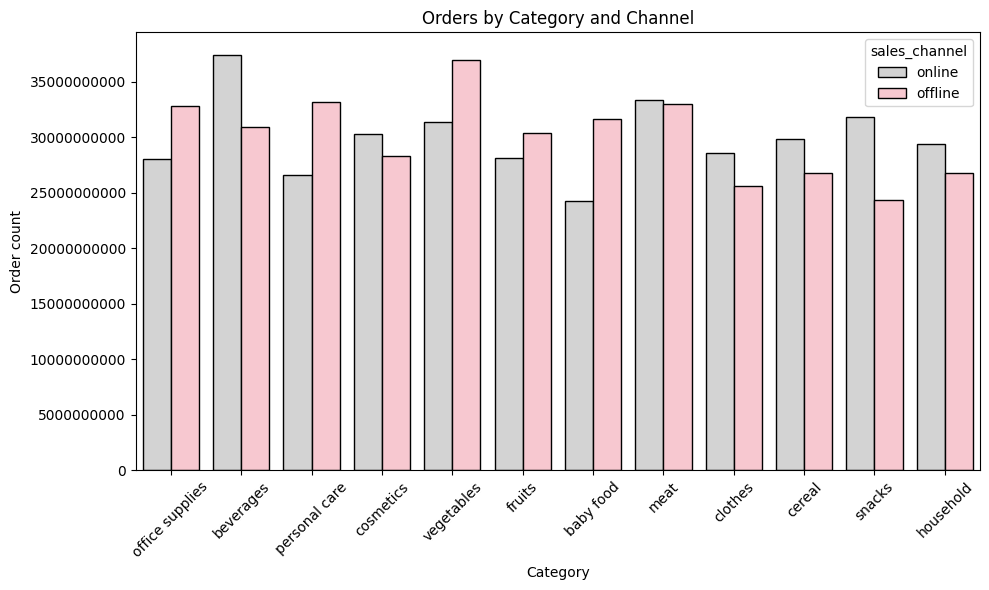

In [ ]:
# sorting the data for the chart
category_sales = sales.groupby("item_type")["order_id"].count().sort_values(ascending=False).index

plt.figure(figsize=(10, 6))
plt.style.use("default")
sns.barplot(data=sales, x="item_type", y="order_id", errorbar=("ci", False), estimator=np.sum, order=category_sales, edgecolor="black", hue="sales_channel", palette=["lightgray", "pink"])
plt.title("Orders by Category and Channel")
plt.xlabel("Category")
plt.ylabel("Order count")
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()


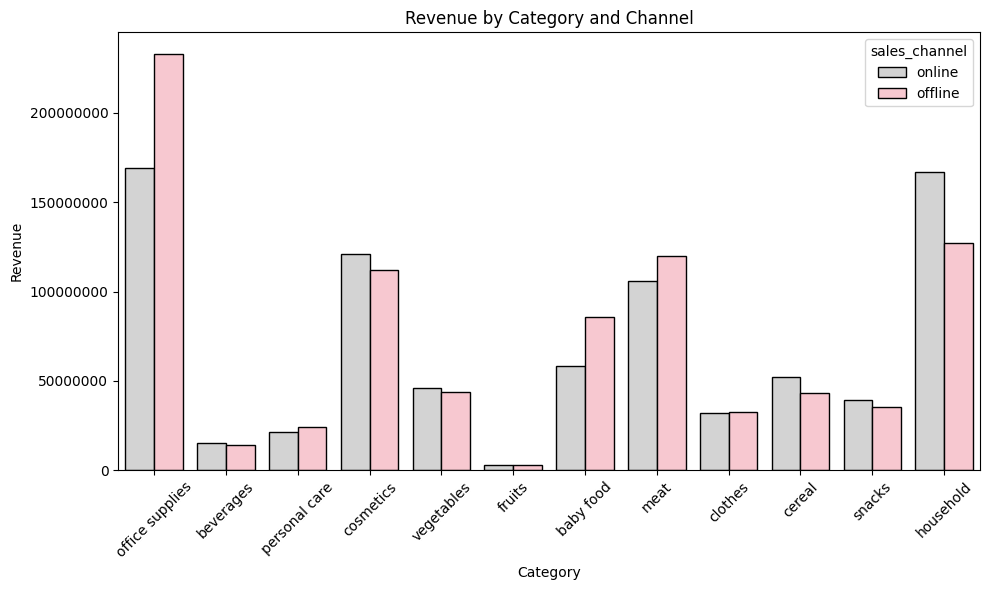

In [ ]:
# sorting the data for the chart
category_rev = sales.groupby("item_type")["revenue"].count().sort_values(ascending=False).index

plt.figure(figsize=(10, 6))
plt.style.use("default")
sns.barplot(data=sales, x="item_type", y="revenue", errorbar=("ci", False), estimator=np.sum, order=category_rev, edgecolor="black", hue="sales_channel", palette=["lightgray", "pink"])
plt.title("Revenue by Category and Channel")
plt.xlabel("Category")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()


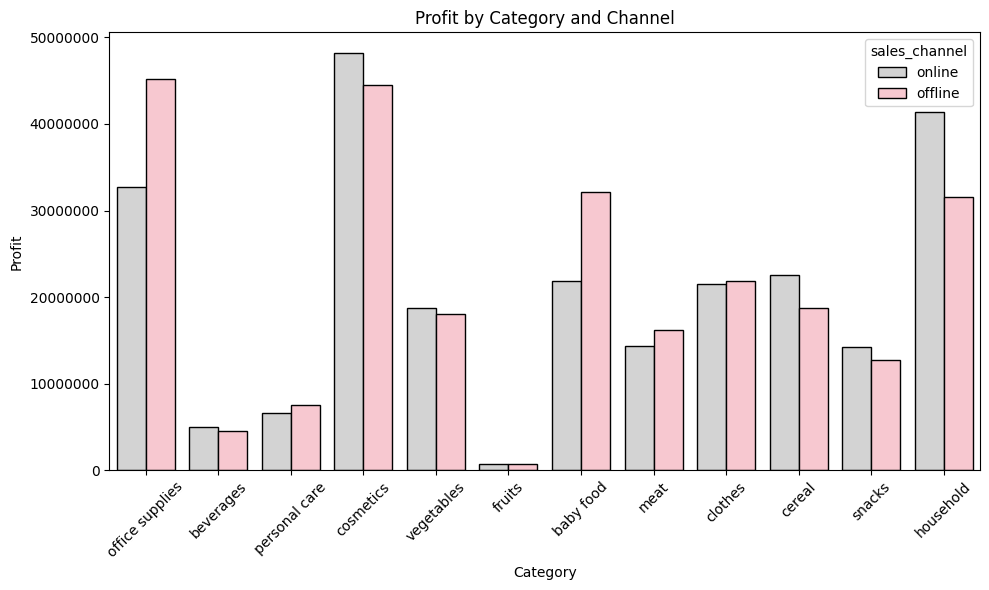

In [ ]:
# sorting the data for the chart
category_profit = sales.groupby("item_type")["profit"].count().sort_values(ascending=False).index

plt.figure(figsize=(10, 6))
plt.style.use("default")
sns.barplot(data=sales, x="item_type", y="profit", errorbar=("ci", False), estimator=np.sum, order=category_profit, edgecolor="black", hue="sales_channel", palette=["lightgray", "pink"])
plt.title("Profit by Category and Channel")
plt.xlabel("Category")
plt.ylabel("Profit")
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()

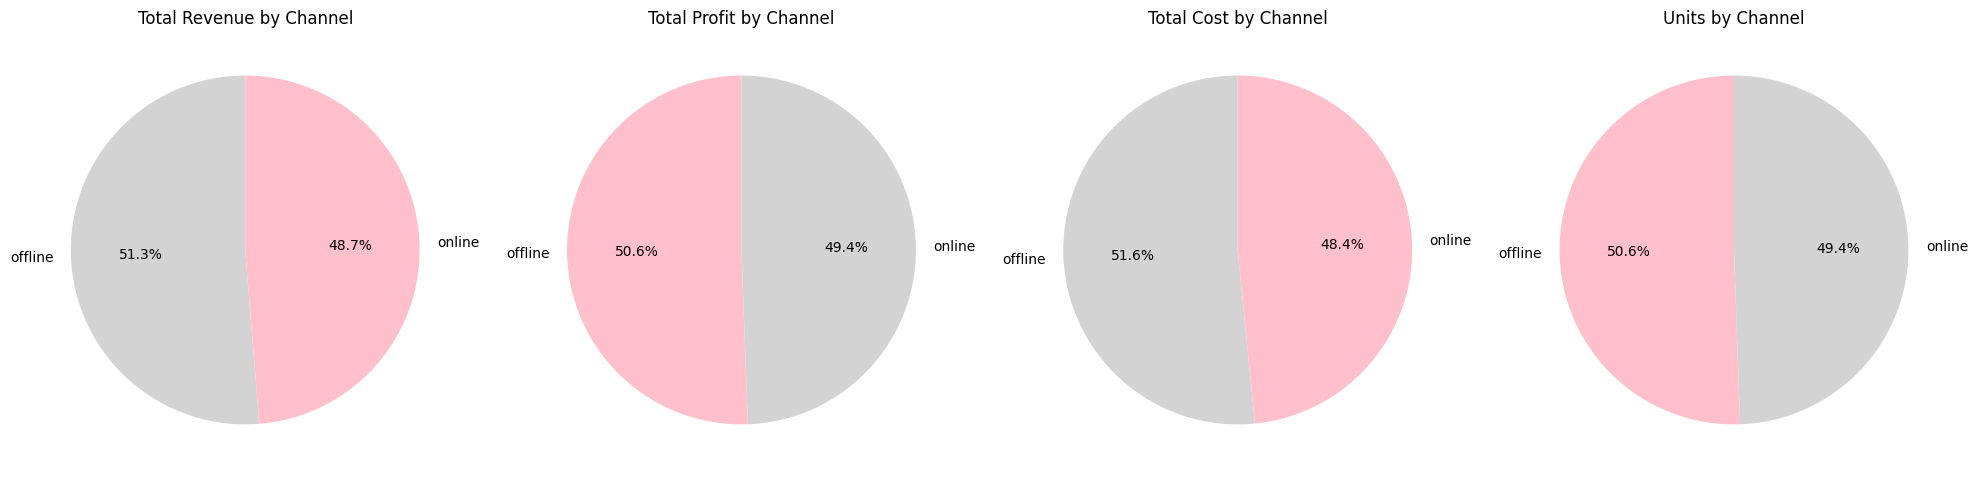

In [ ]:
# Data aggregation

# 1. Revenue per Channel
channel_revenue = sales.groupby("sales_channel")["revenue"].sum()

# 2. Profit per Channel
channel_profit = sales.groupby("sales_channel")["profit"].sum()

# 3. Cost per Channel
channel_cost = sales.groupby("sales_channel")["total_cost"].sum()

# 4. Items Sold per Channel
channel_sold = sales.groupby("sales_channel")["units_sold"].sum()

# Creating chart
fig, ax = plt.subplots(1, 4, figsize=(20, 6))
plt.style.use("default")

ax[0].pie(
    channel_revenue.values,
    labels=channel_revenue.index,
    colors=["lightgray", "pink"],
    autopct='%1.1f%%',                    # formating %
    startangle=90
)
ax[0].set_title("Total Revenue by Channel")

ax[1].pie(
    channel_profit.values,
    labels=channel_profit.index,
    colors=["pink", "lightgray"],
    autopct='%1.1f%%',
    startangle=90
)
ax[1].set_title("Total Profit by Channel")

ax[2].pie(
    channel_cost.values,
    labels=channel_cost.index,
    colors=["lightgray", "pink"],
    autopct='%1.1f%%',
    startangle=90
)
ax[2].set_title("Total Cost by Channel")

ax[3].pie(
    channel_sold.values,
    labels=channel_sold.index,
    colors=["pink", "lightgray"],
    autopct='%1.1f%%',
    startangle=90
)
ax[3].set_title("Units by Channel")

plt.tight_layout()
plt.show()

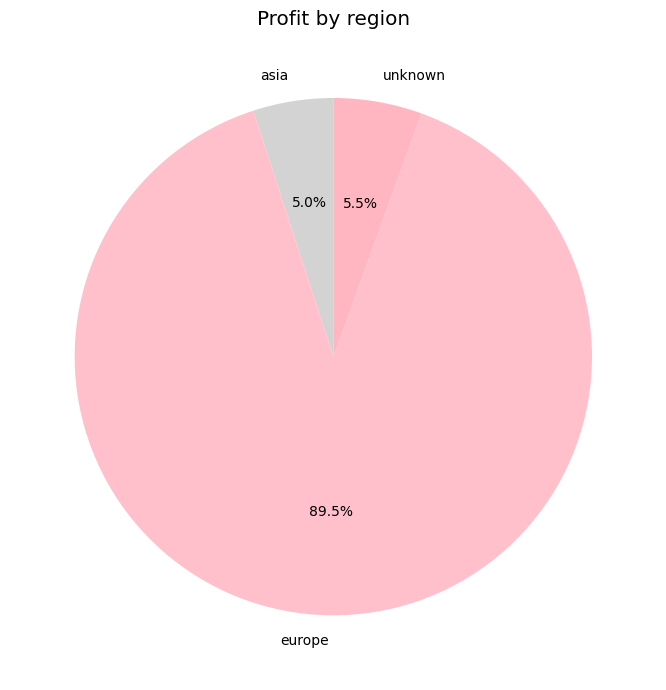

In [ ]:
#profit by region
profit_by_region = sales.groupby("region")["profit"].sum()
plt.figure(figsize=(7, 7))
plt.style.use("ggplot")
plt.pie(profit_by_region, labels=profit_by_region.index, autopct='%1.1f%%', startangle=90, colors = ['lightgray', 'pink', '#FFB6C1'] )
plt.title("Profit by region")
plt.tight_layout()
plt.show()

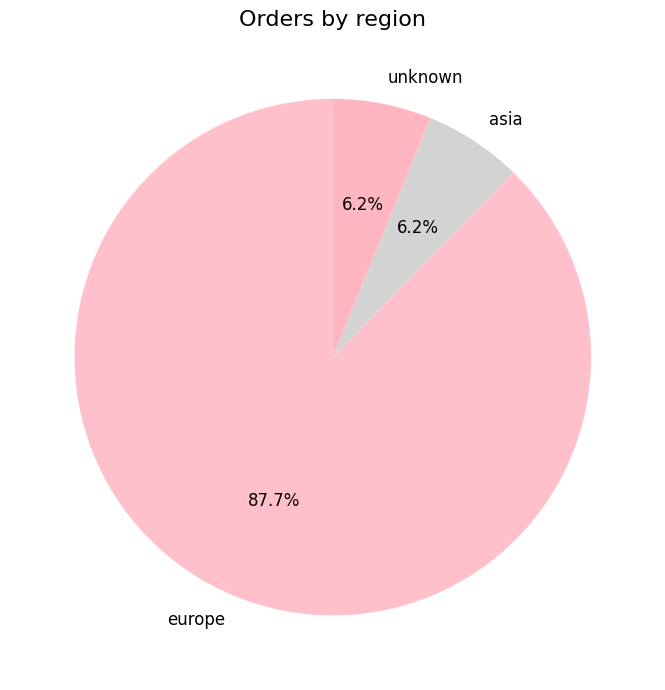

In [ ]:
# Data aggregation
region_order_count = sales.groupby("region")["order_id"].count().sort_values(ascending=False)

# Colors
colors = ['pink', 'lightgray', '#FFB6C1']

# Creating chart
plt.figure(figsize=(7, 7))
plt.style.use("default")

plt.pie(
    region_order_count.values,
    labels=region_order_count.index,
    colors=colors[:len(region_order_count)],
    autopct='%1.1f%%',
    startangle=90,
    textprops={'fontsize': 12}
)

plt.title('Orders by region', fontsize=16)
plt.tight_layout()
plt.show()

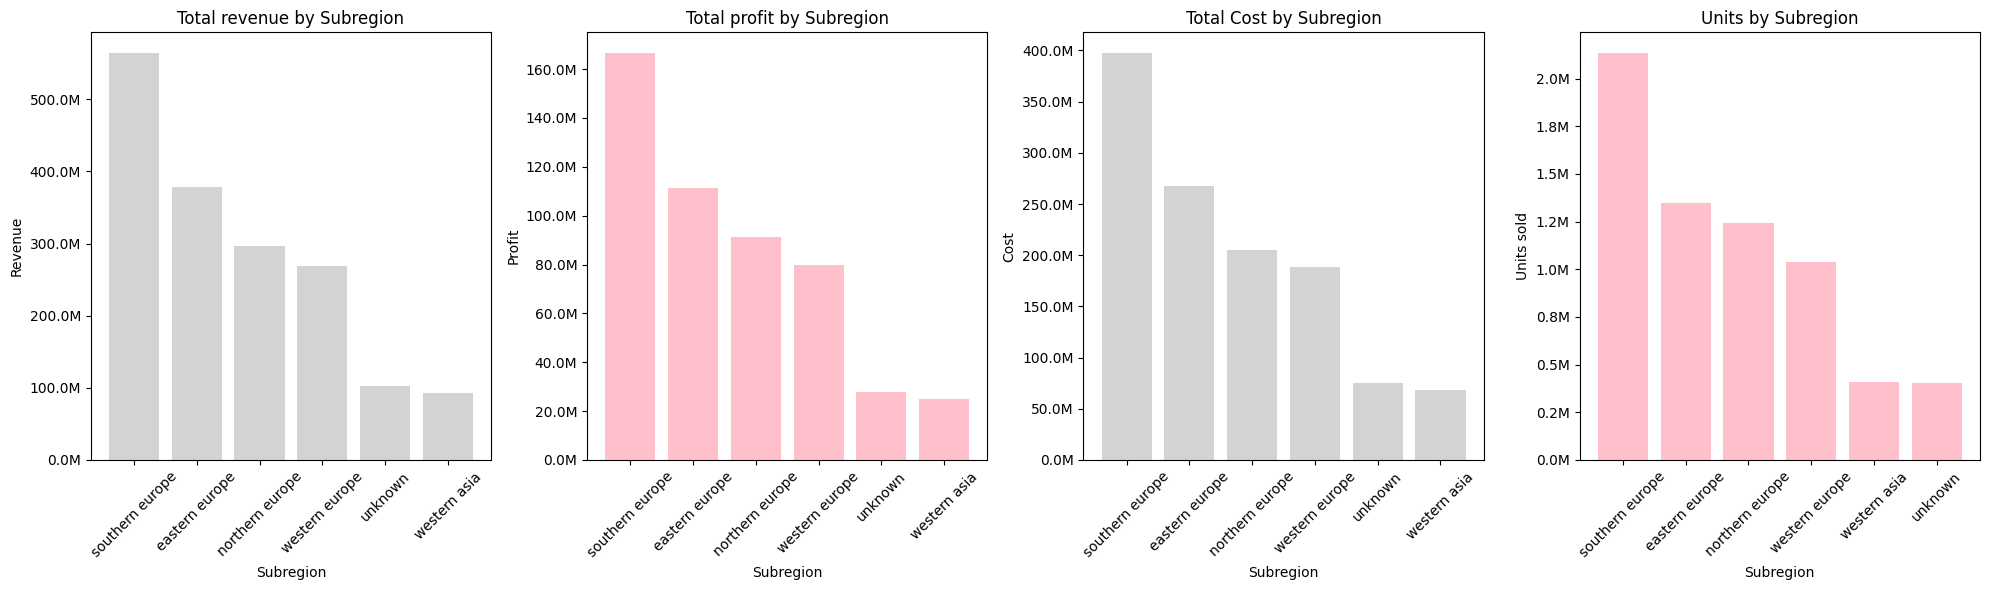

In [ ]:
from matplotlib.ticker import FuncFormatter
def millions_formatter(x, pos):
    # 6000000 --> 6.0M)
    return f'{x*1e-6:.1f}M'

# Creating a chart of subplots
fig, ax = plt.subplots(1, 4, figsize=(20, 6))
for i in range(4): # Iterate through the 4 subplots
    # formating for y axis
    ax[i].yaxis.set_major_formatter(FuncFormatter(millions_formatter))
    # Rotate x-axis labels for better readability
    ax[i].tick_params(axis='x', rotation=45)

# Revenue by subregion
subregion_revenue = sales.groupby("sub-region")["revenue"].sum().reset_index().sort_values(by="revenue", ascending=False) # aggregating revenue

ax[0].bar(subregion_revenue["sub-region"], subregion_revenue["revenue"], color="lightgray")
ax[0].set_title("Total revenue by Subregion")
ax[0].set_xlabel("Subregion")
ax[0].set_ylabel("Revenue")


# Second subplot - Profit by subregion
subregion_profit = sales.groupby("sub-region")["profit"].sum().reset_index().sort_values(by="profit", ascending=False) # aggregating profit

ax[1].bar(subregion_profit["sub-region"], subregion_profit["profit"], color="pink")
ax[1].set_title("Total profit by Subregion")
ax[1].set_xlabel("Subregion")
ax[1].set_ylabel("Profit")

# Third subplot - Cost by subregion
subregion_cost = sales.groupby("sub-region")["total_cost"].sum().reset_index().sort_values(by="total_cost", ascending=False) # aggregating cost

ax[2].bar(subregion_cost["sub-region"], subregion_cost["total_cost"], color="lightgray")
ax[2].set_title("Total Cost by Subregion")
ax[2].set_xlabel("Subregion")
ax[2].set_ylabel("Cost")

# Fourth subplot - Items Sold by subregion
subregion_sold = sales.groupby("sub-region")["units_sold"].sum().reset_index().sort_values(by="units_sold", ascending=False) # aggregating quantity

ax[3].bar(subregion_sold["sub-region"], subregion_sold["units_sold"], color="pink")
ax[3].set_title("Units by Subregion")
ax[3].set_xlabel("Subregion")
ax[3].set_ylabel("Units sold")

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

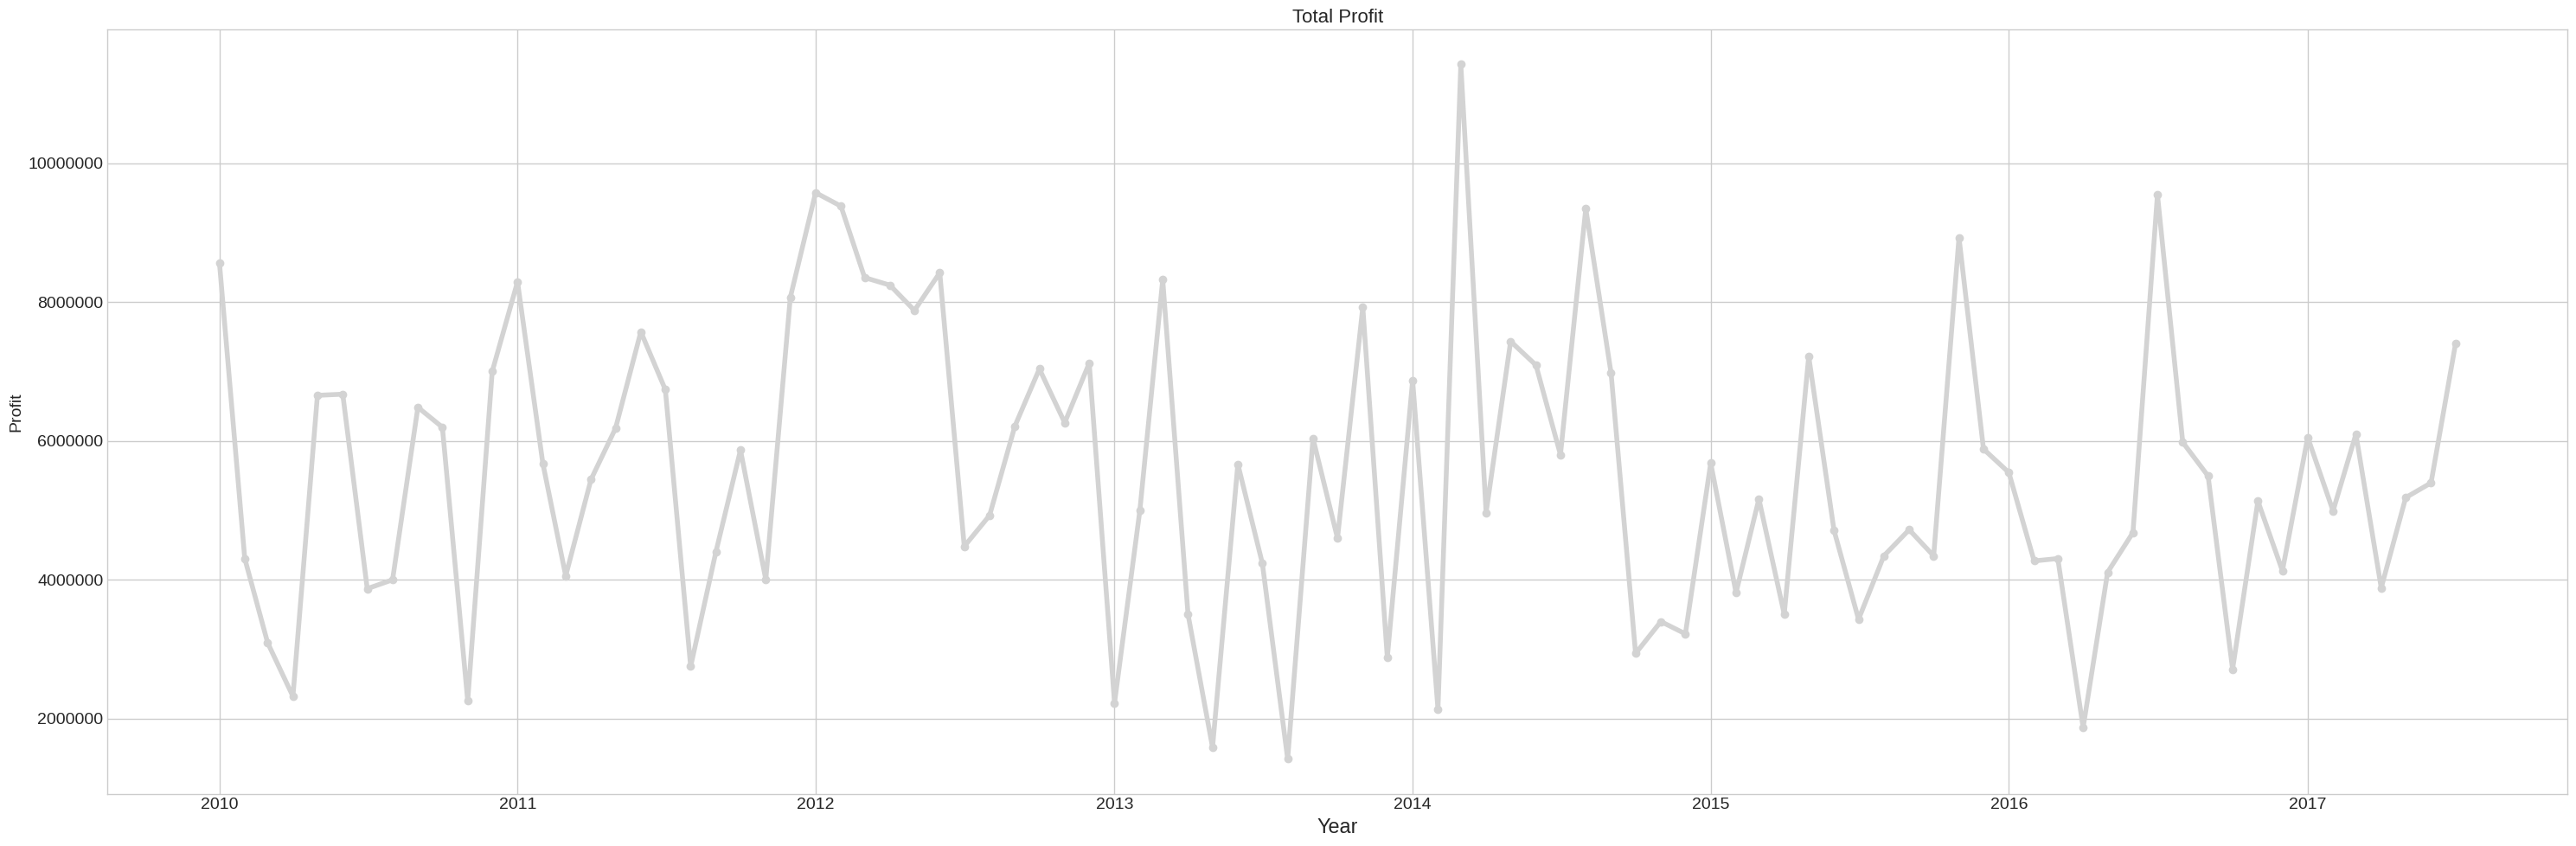

In [ ]:
total_profit_dynamic = sales.groupby("year_month")["profit"].sum().reset_index()

plt.figure(figsize=(30, 10))
plt.style.use("seaborn-v0_8-whitegrid")
plt.plot(total_profit_dynamic["year_month"], total_profit_dynamic["profit"], marker="o", color="lightgray")
plt.title("Total Profit", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Profit", fontsize=14)
plt.ticklabel_format(style='plain', axis='y') # add ticklabel_format to show full numbers

plt.tight_layout()
plt.show()

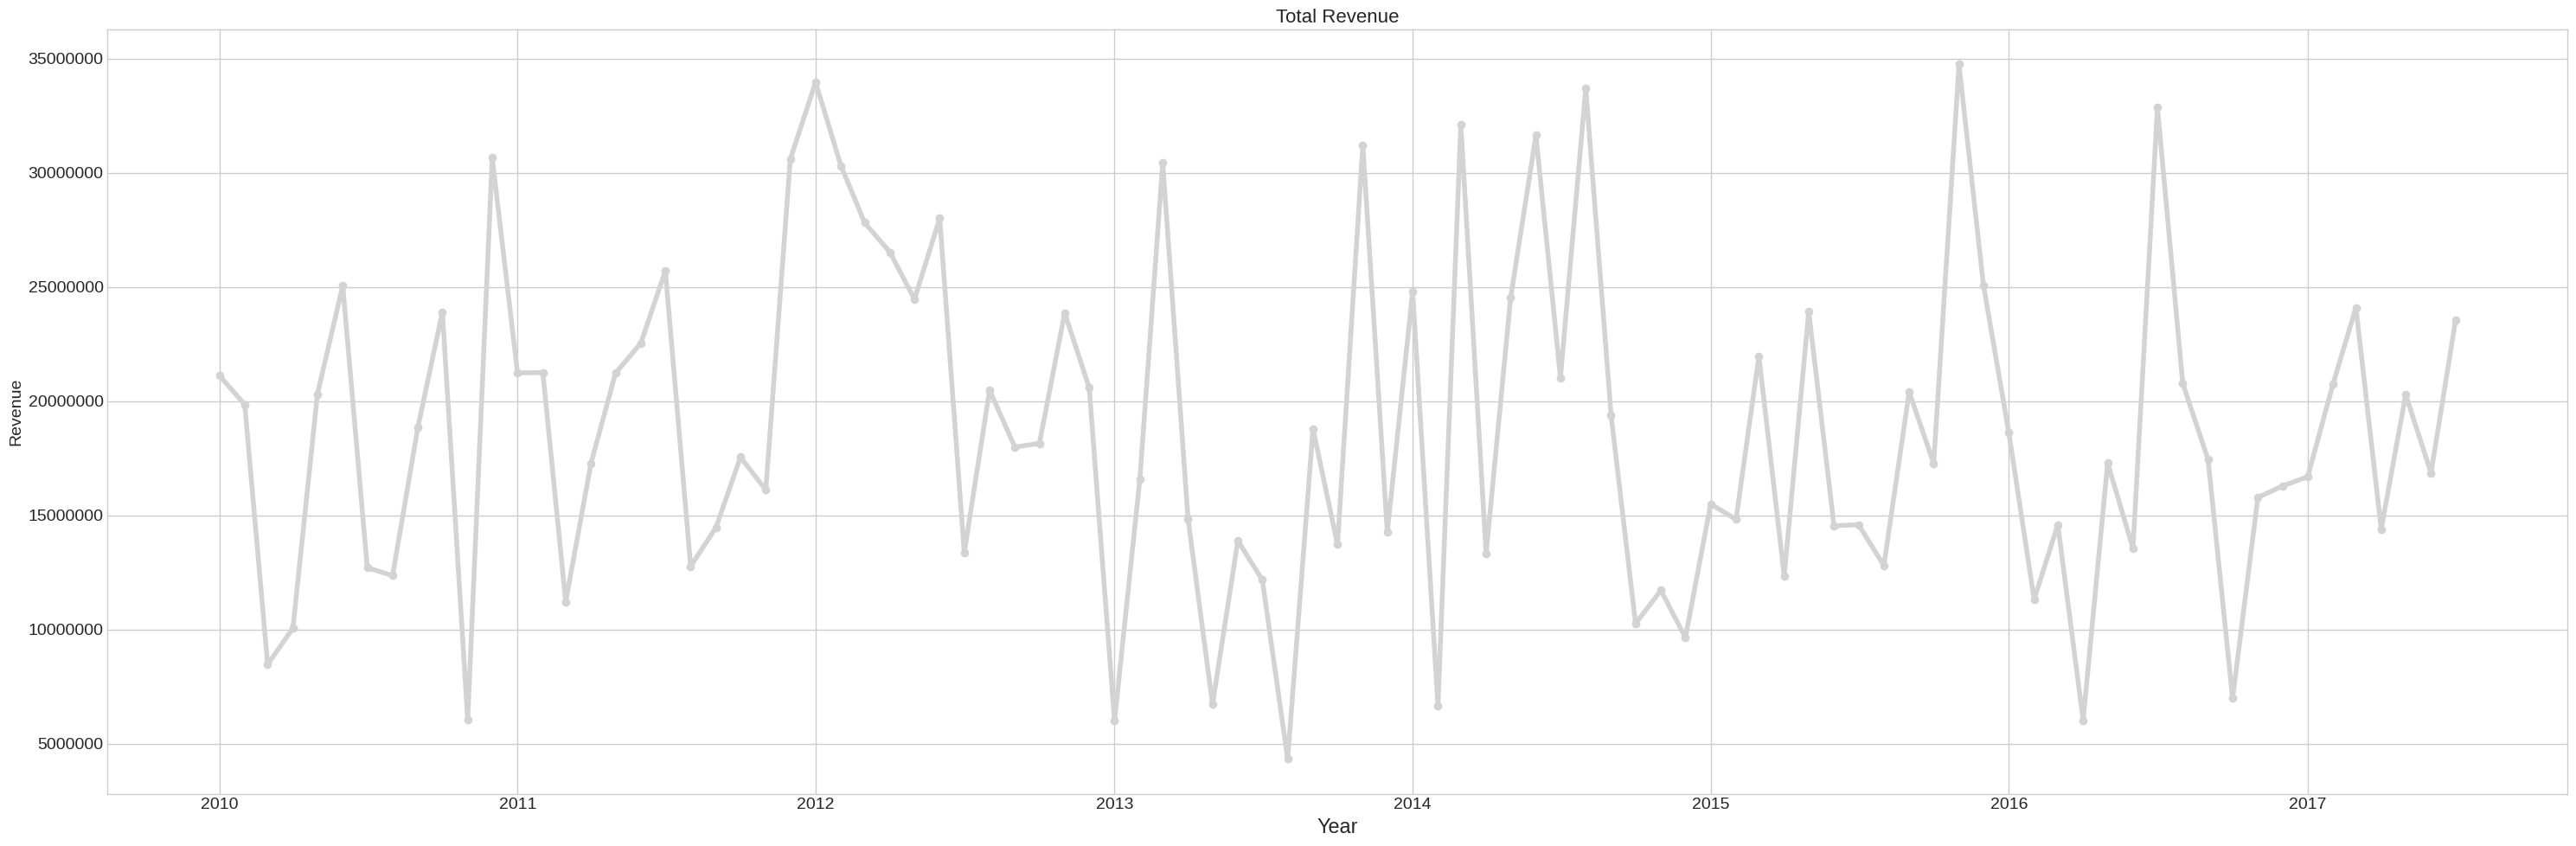

In [ ]:
total_revenue_dynamic = sales.groupby("year_month")["revenue"].sum().reset_index()

plt.figure(figsize=(30, 10))
plt.style.use("seaborn-v0_8-whitegrid")
plt.plot(total_revenue_dynamic["year_month"], total_revenue_dynamic["revenue"], marker="o", color="lightgray")
plt.title("Total Revenue", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Revenue", fontsize=14)
plt.ticklabel_format(style='plain', axis='y') # add ticklabel_format to show full numbers

plt.tight_layout()
plt.show()

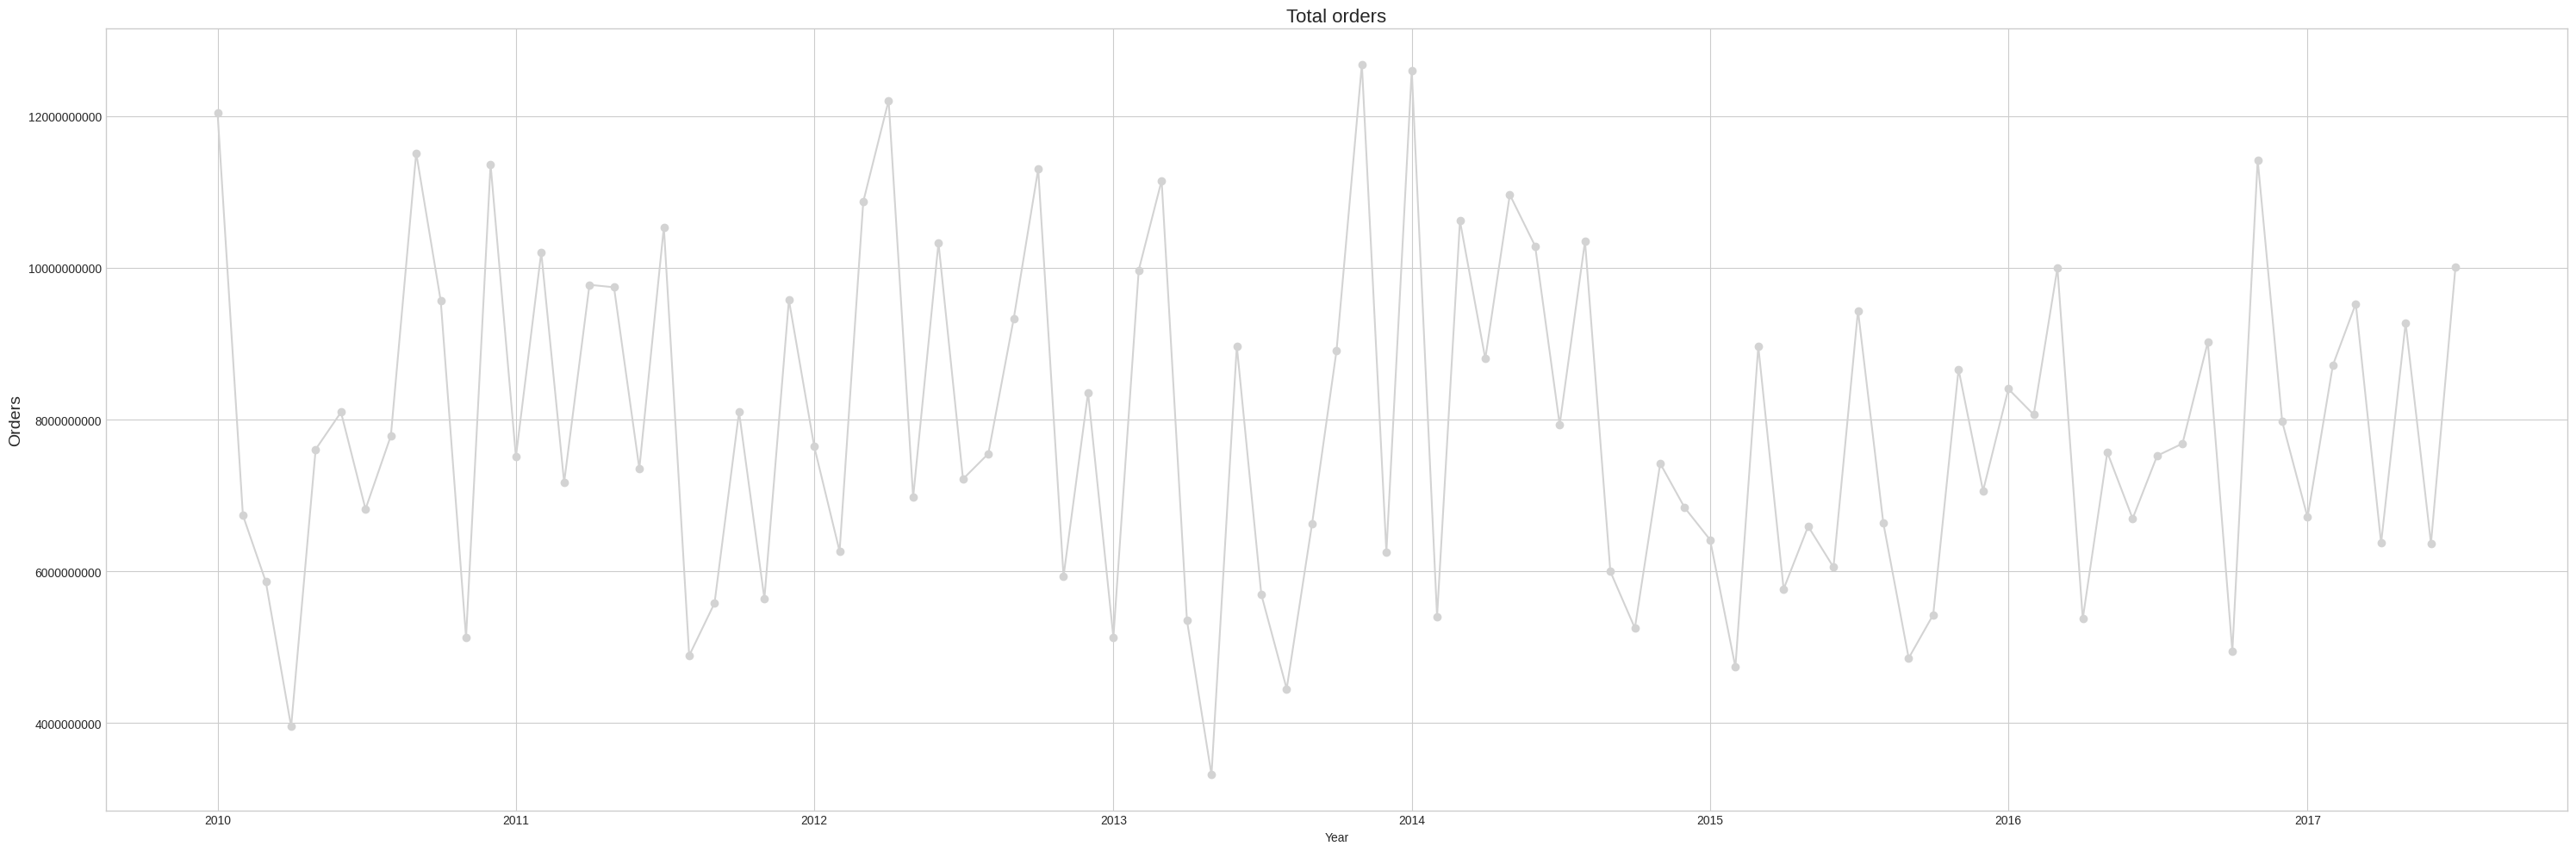

In [ ]:
total_orders_dynamic = sales.groupby("year_month")["order_id"].sum().reset_index()

plt.figure(figsize=(30, 10))
plt.style.use("seaborn-v0_8-whitegrid")
plt.plot(total_orders_dynamic["year_month"], total_orders_dynamic["order_id"], marker="o", color="lightgray")
plt.title("Total orders", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Orders", fontsize=14)
plt.ticklabel_format(style='plain', axis='y') # add ticklabel_format to show full numbers

plt.tight_layout()
plt.show()

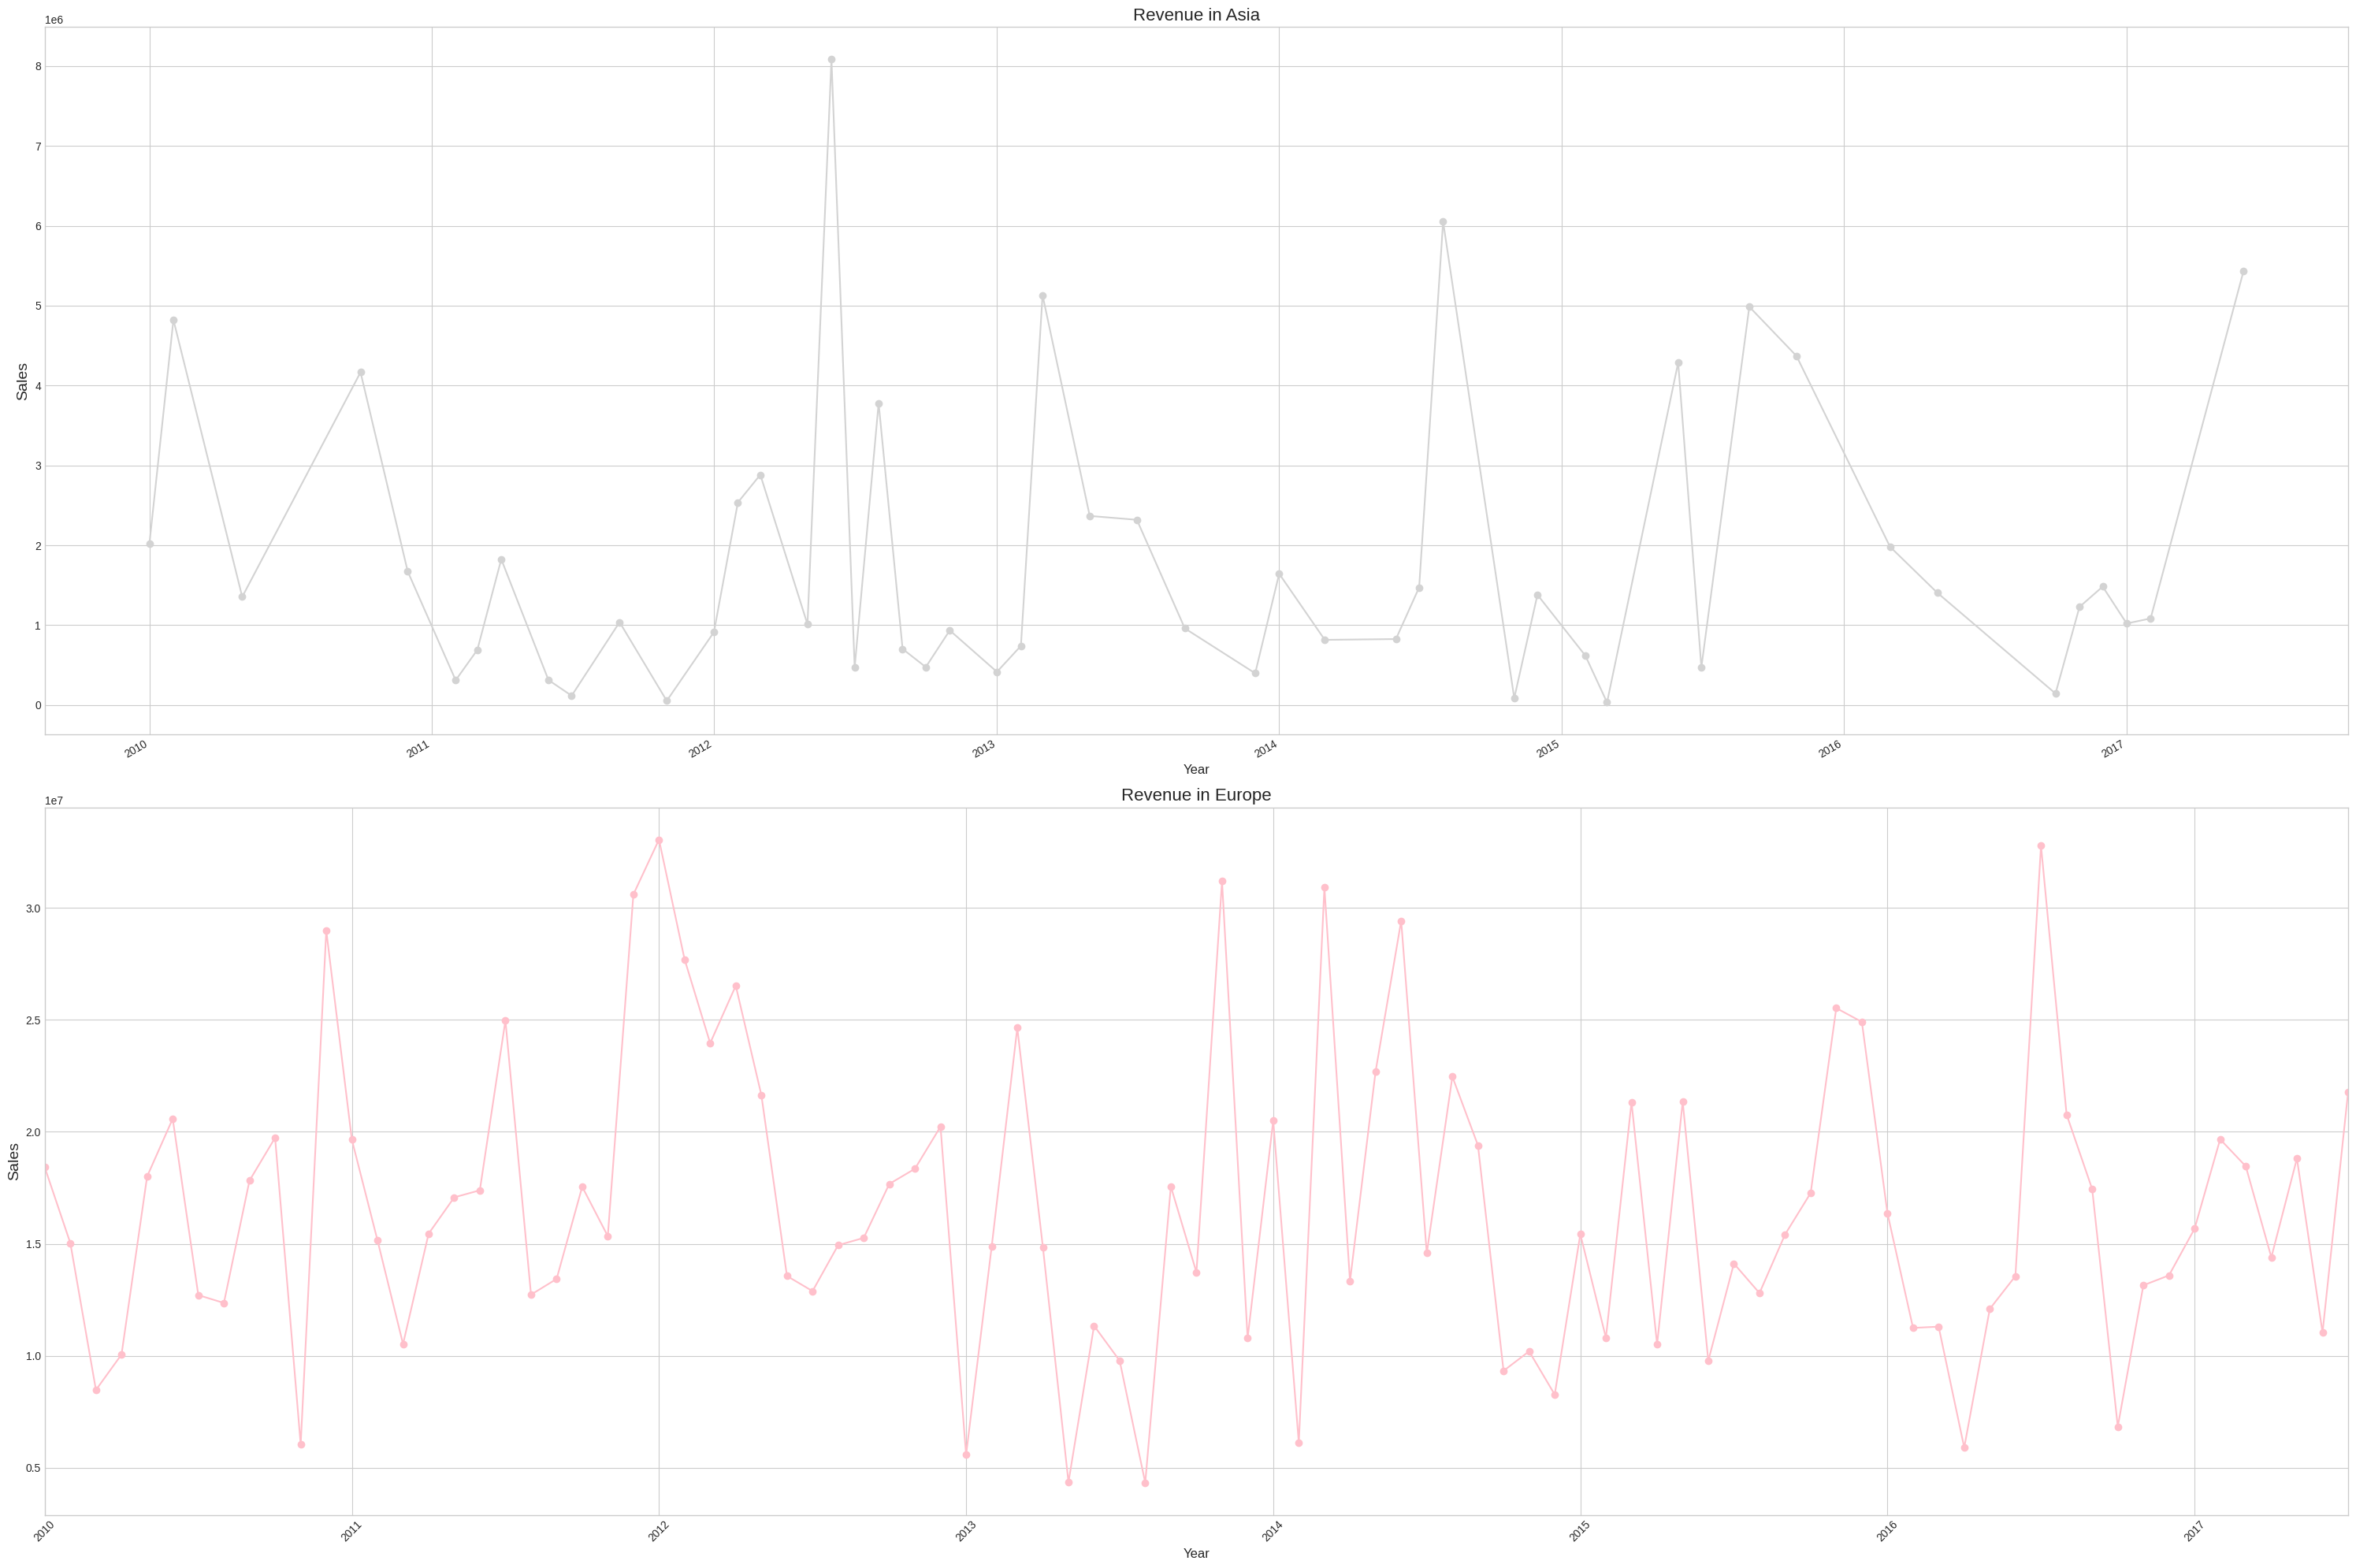

In [ ]:
# sorting the data for the chart
sales_asia = sales[sales["region"] == "asia"]
sales_dynamic_asia = sales_asia.groupby("year_month")["revenue"].sum()


sales_europe = sales[sales["region"] == "europe"]
sales_dynamic_europe = sales_europe.groupby("year_month")["revenue"].sum()


fig, ax = plt.subplots(2, 1, figsize=(30, 20), sharex=False)
plt.style.use("seaborn-v0_8-whitegrid")

sales_dynamic_asia.plot(kind="line", ax=ax[0], color="lightgray", marker="o")
ax[0].set_title("Revenue in Asia", fontsize=16)
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Sales", fontsize=14)


sales_dynamic_europe.plot(kind="line", ax=ax[1], color="pink", marker="o")
ax[1].set_title("Revenue in Europe", fontsize=16)
ax[1].set_xlabel("Year")
ax[1].set_ylabel("Sales", fontsize=14)


plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

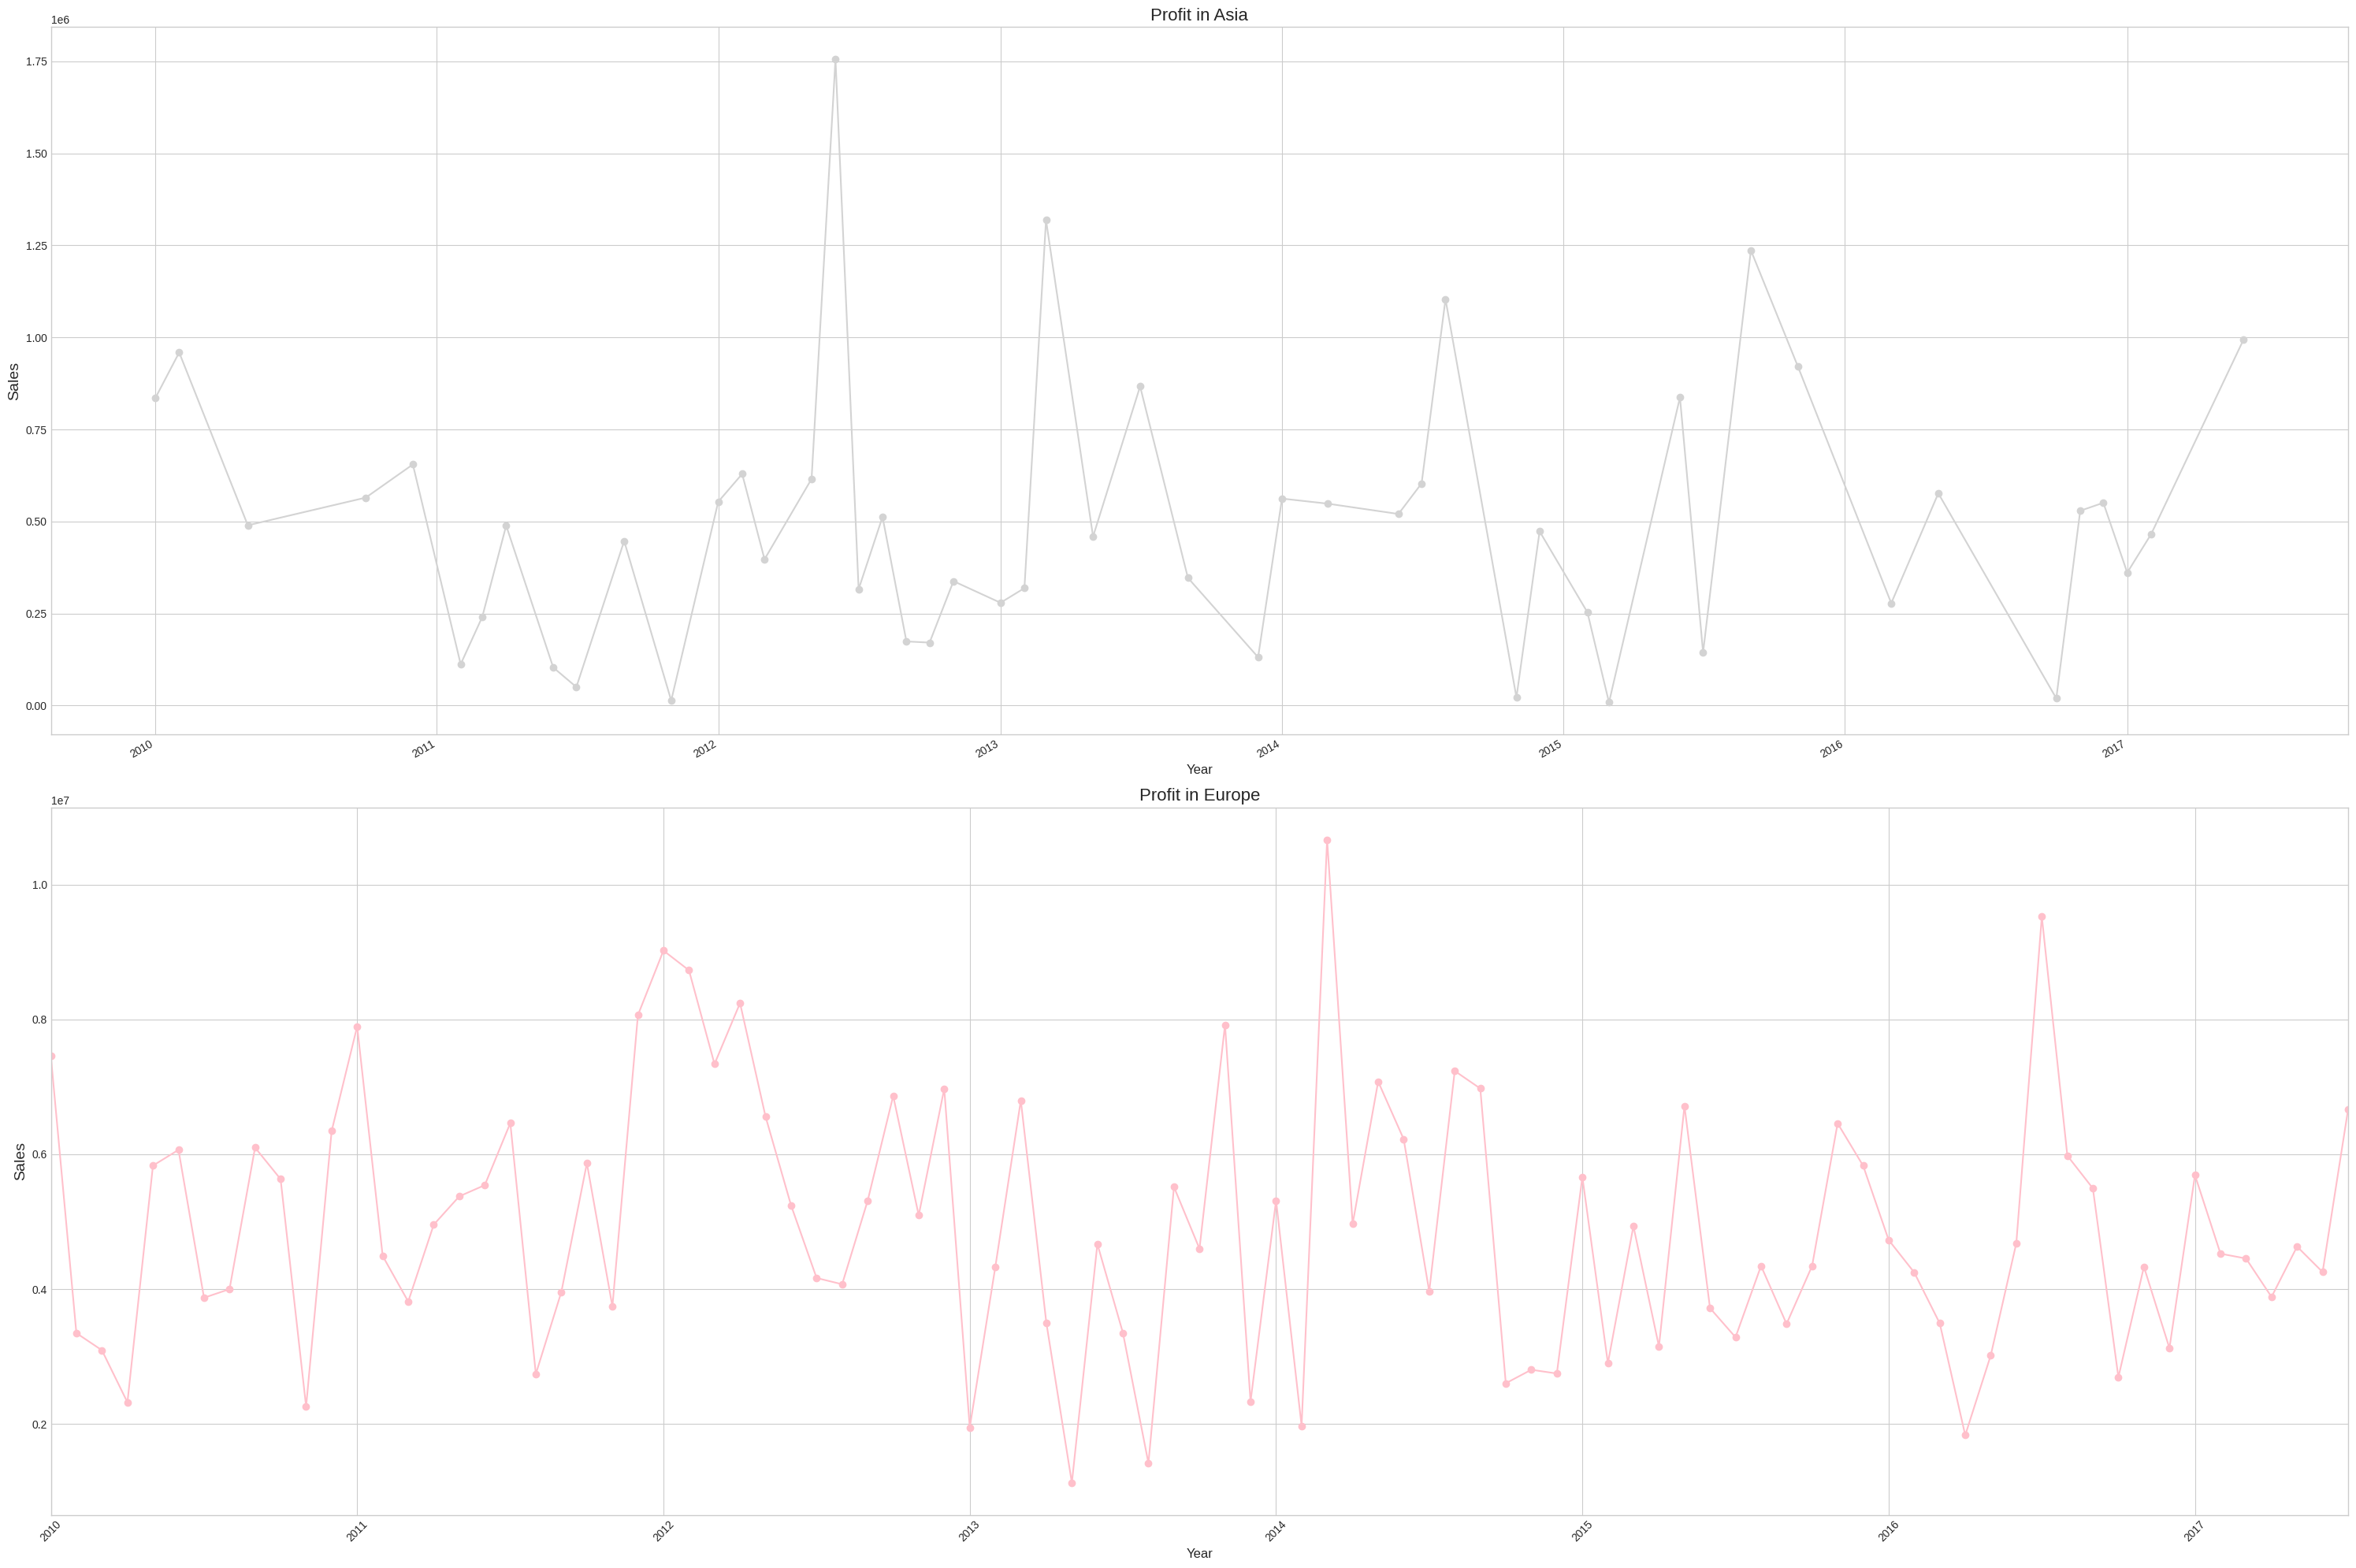

In [ ]:
# sorting the data for the chart
sales_asia = sales[sales["region"] == "asia"]
sales_dynamic_asia = sales_asia.groupby("year_month")["profit"].sum()


sales_europe = sales[sales["region"] == "europe"]
sales_dynamic_europe = sales_europe.groupby("year_month")["profit"].sum()


fig, ax = plt.subplots(2, 1, figsize=(30, 20), sharex=False)
plt.style.use("seaborn-v0_8-whitegrid")

sales_dynamic_asia.plot(kind="line", ax=ax[0], color="lightgray", marker="o")
ax[0].set_title("Profit in Asia", fontsize=16)
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Sales", fontsize=14)


sales_dynamic_europe.plot(kind="line", ax=ax[1], color="pink", marker="o")
ax[1].set_title("Profit in Europe", fontsize=16)
ax[1].set_xlabel("Year")
ax[1].set_ylabel("Sales", fontsize=14)


plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

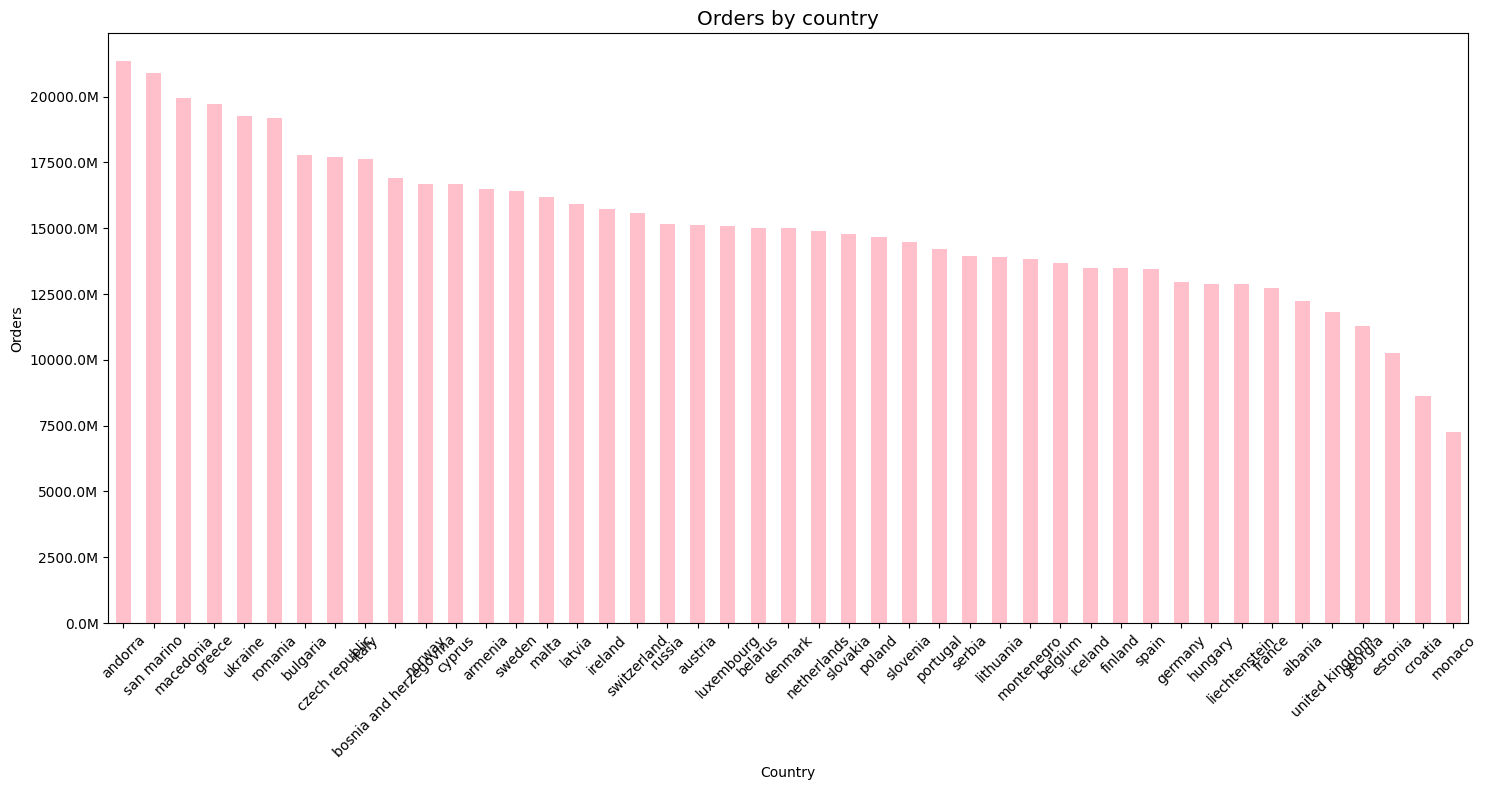

In [ ]:
from matplotlib.ticker import FuncFormatter
def millions_formatter(x, pos):
    # 6000000 --> 6.0M)
    return f'{x*1e-6:.1f}M'

# sorting the data for the chart
sales_country = sales.groupby("country")["order_id"].sum().sort_values(ascending=False)
plt.figure(figsize=(15, 8))
sales_country.plot(kind="bar", color="pink")
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.style.use("ggplot")
plt.title("Orders by country")
plt.xlabel("Country")
plt.ylabel("Orders")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

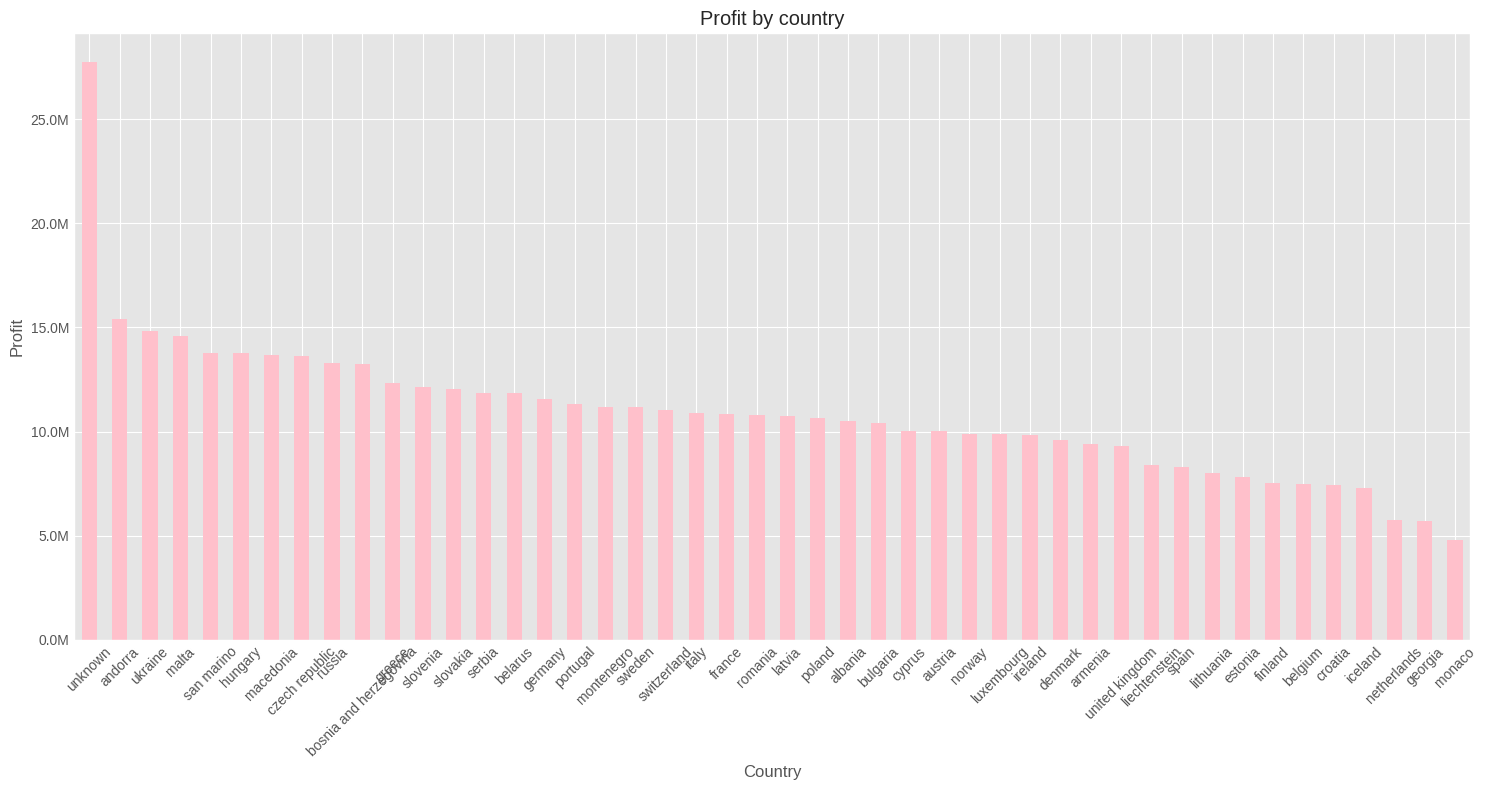

In [ ]:
# sorting the data for the chart
profit_country = sales.groupby("country")["profit"].sum().sort_values(ascending=False)
plt.figure(figsize=(15, 8))
profit_country.plot(kind="bar", color="pink")
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.style.use("ggplot")
plt.title("Profit by country")
plt.xlabel("Country")
plt.ylabel("Profit")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

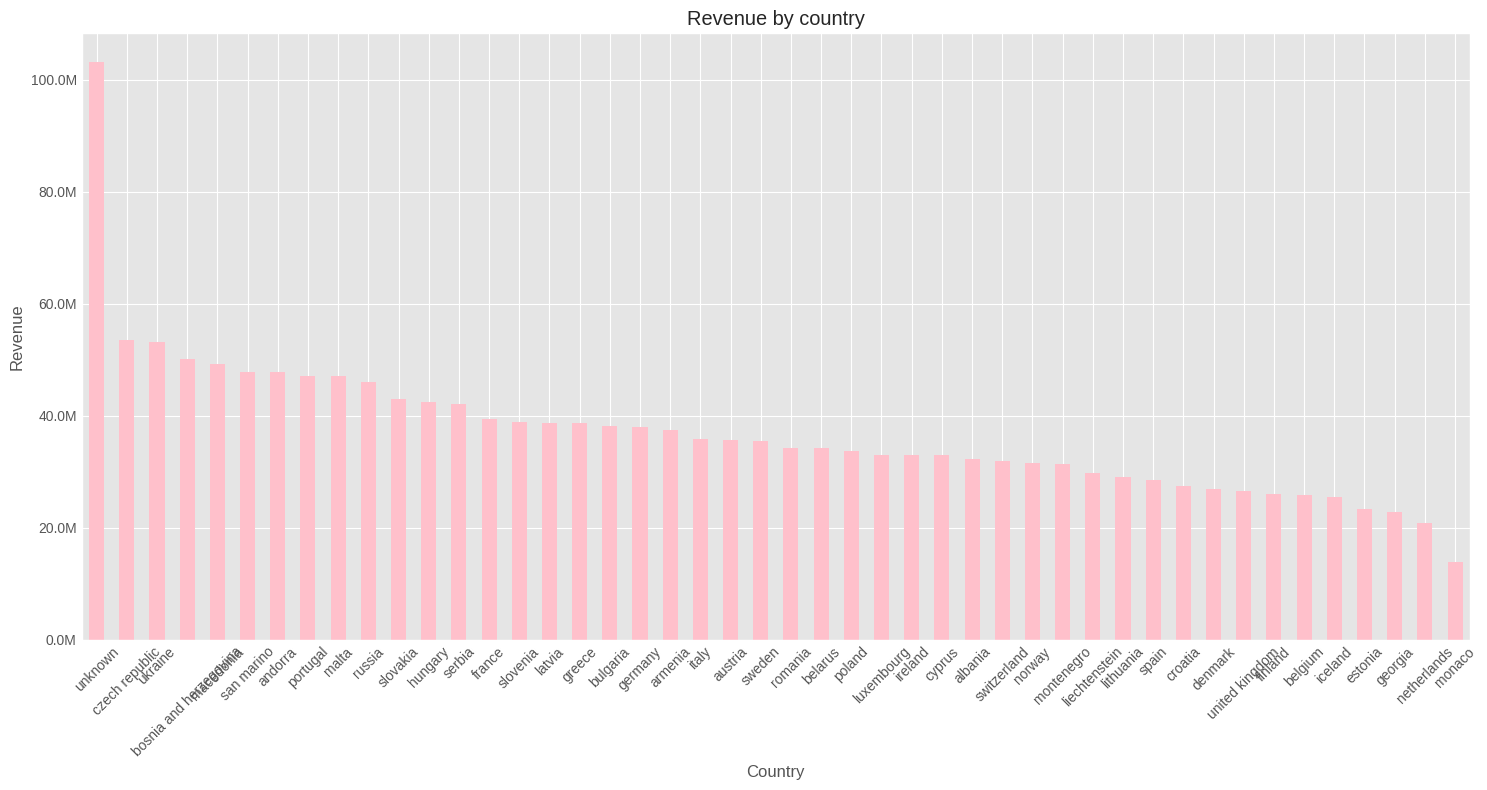

In [ ]:


# sorting the data for the chart
revenue_country = sales.groupby("country")["revenue"].sum().sort_values(ascending=False)
plt.figure(figsize=(15, 8))
revenue_country.plot(kind="bar", color="pink")
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.style.use("ggplot")
plt.title("Revenue by country")
plt.xlabel("Country")
plt.ylabel("Revenue")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

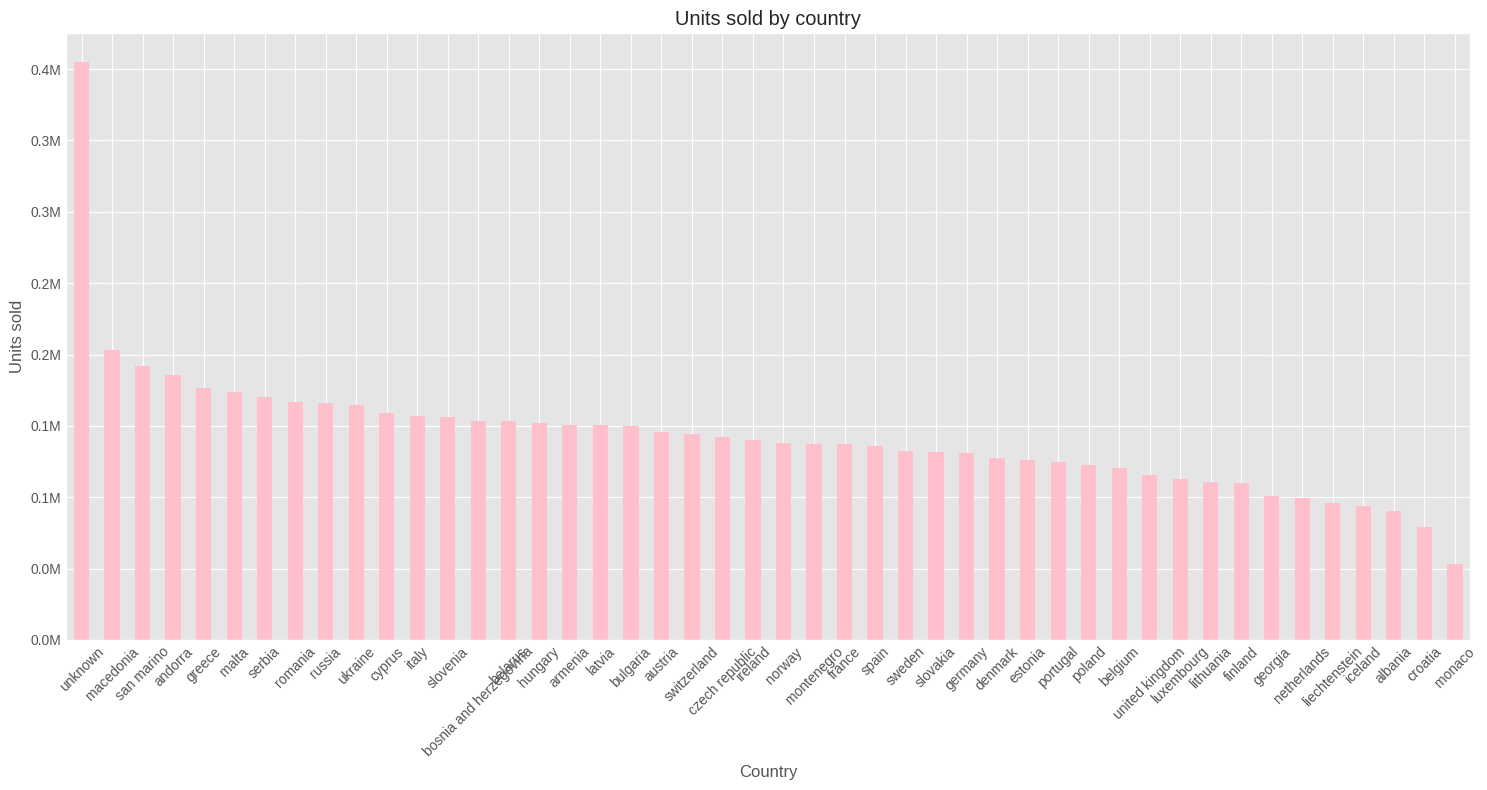

In [ ]:
# sorting the data for the chart
units_sold_country = sales.groupby("country")["units_sold"].sum().sort_values(ascending=False)
plt.figure(figsize=(15, 8))
units_sold_country.plot(kind="bar", color="pink")
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.style.use("ggplot")
plt.title("Units sold by country")
plt.xlabel("Country")
plt.ylabel("Units sold")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

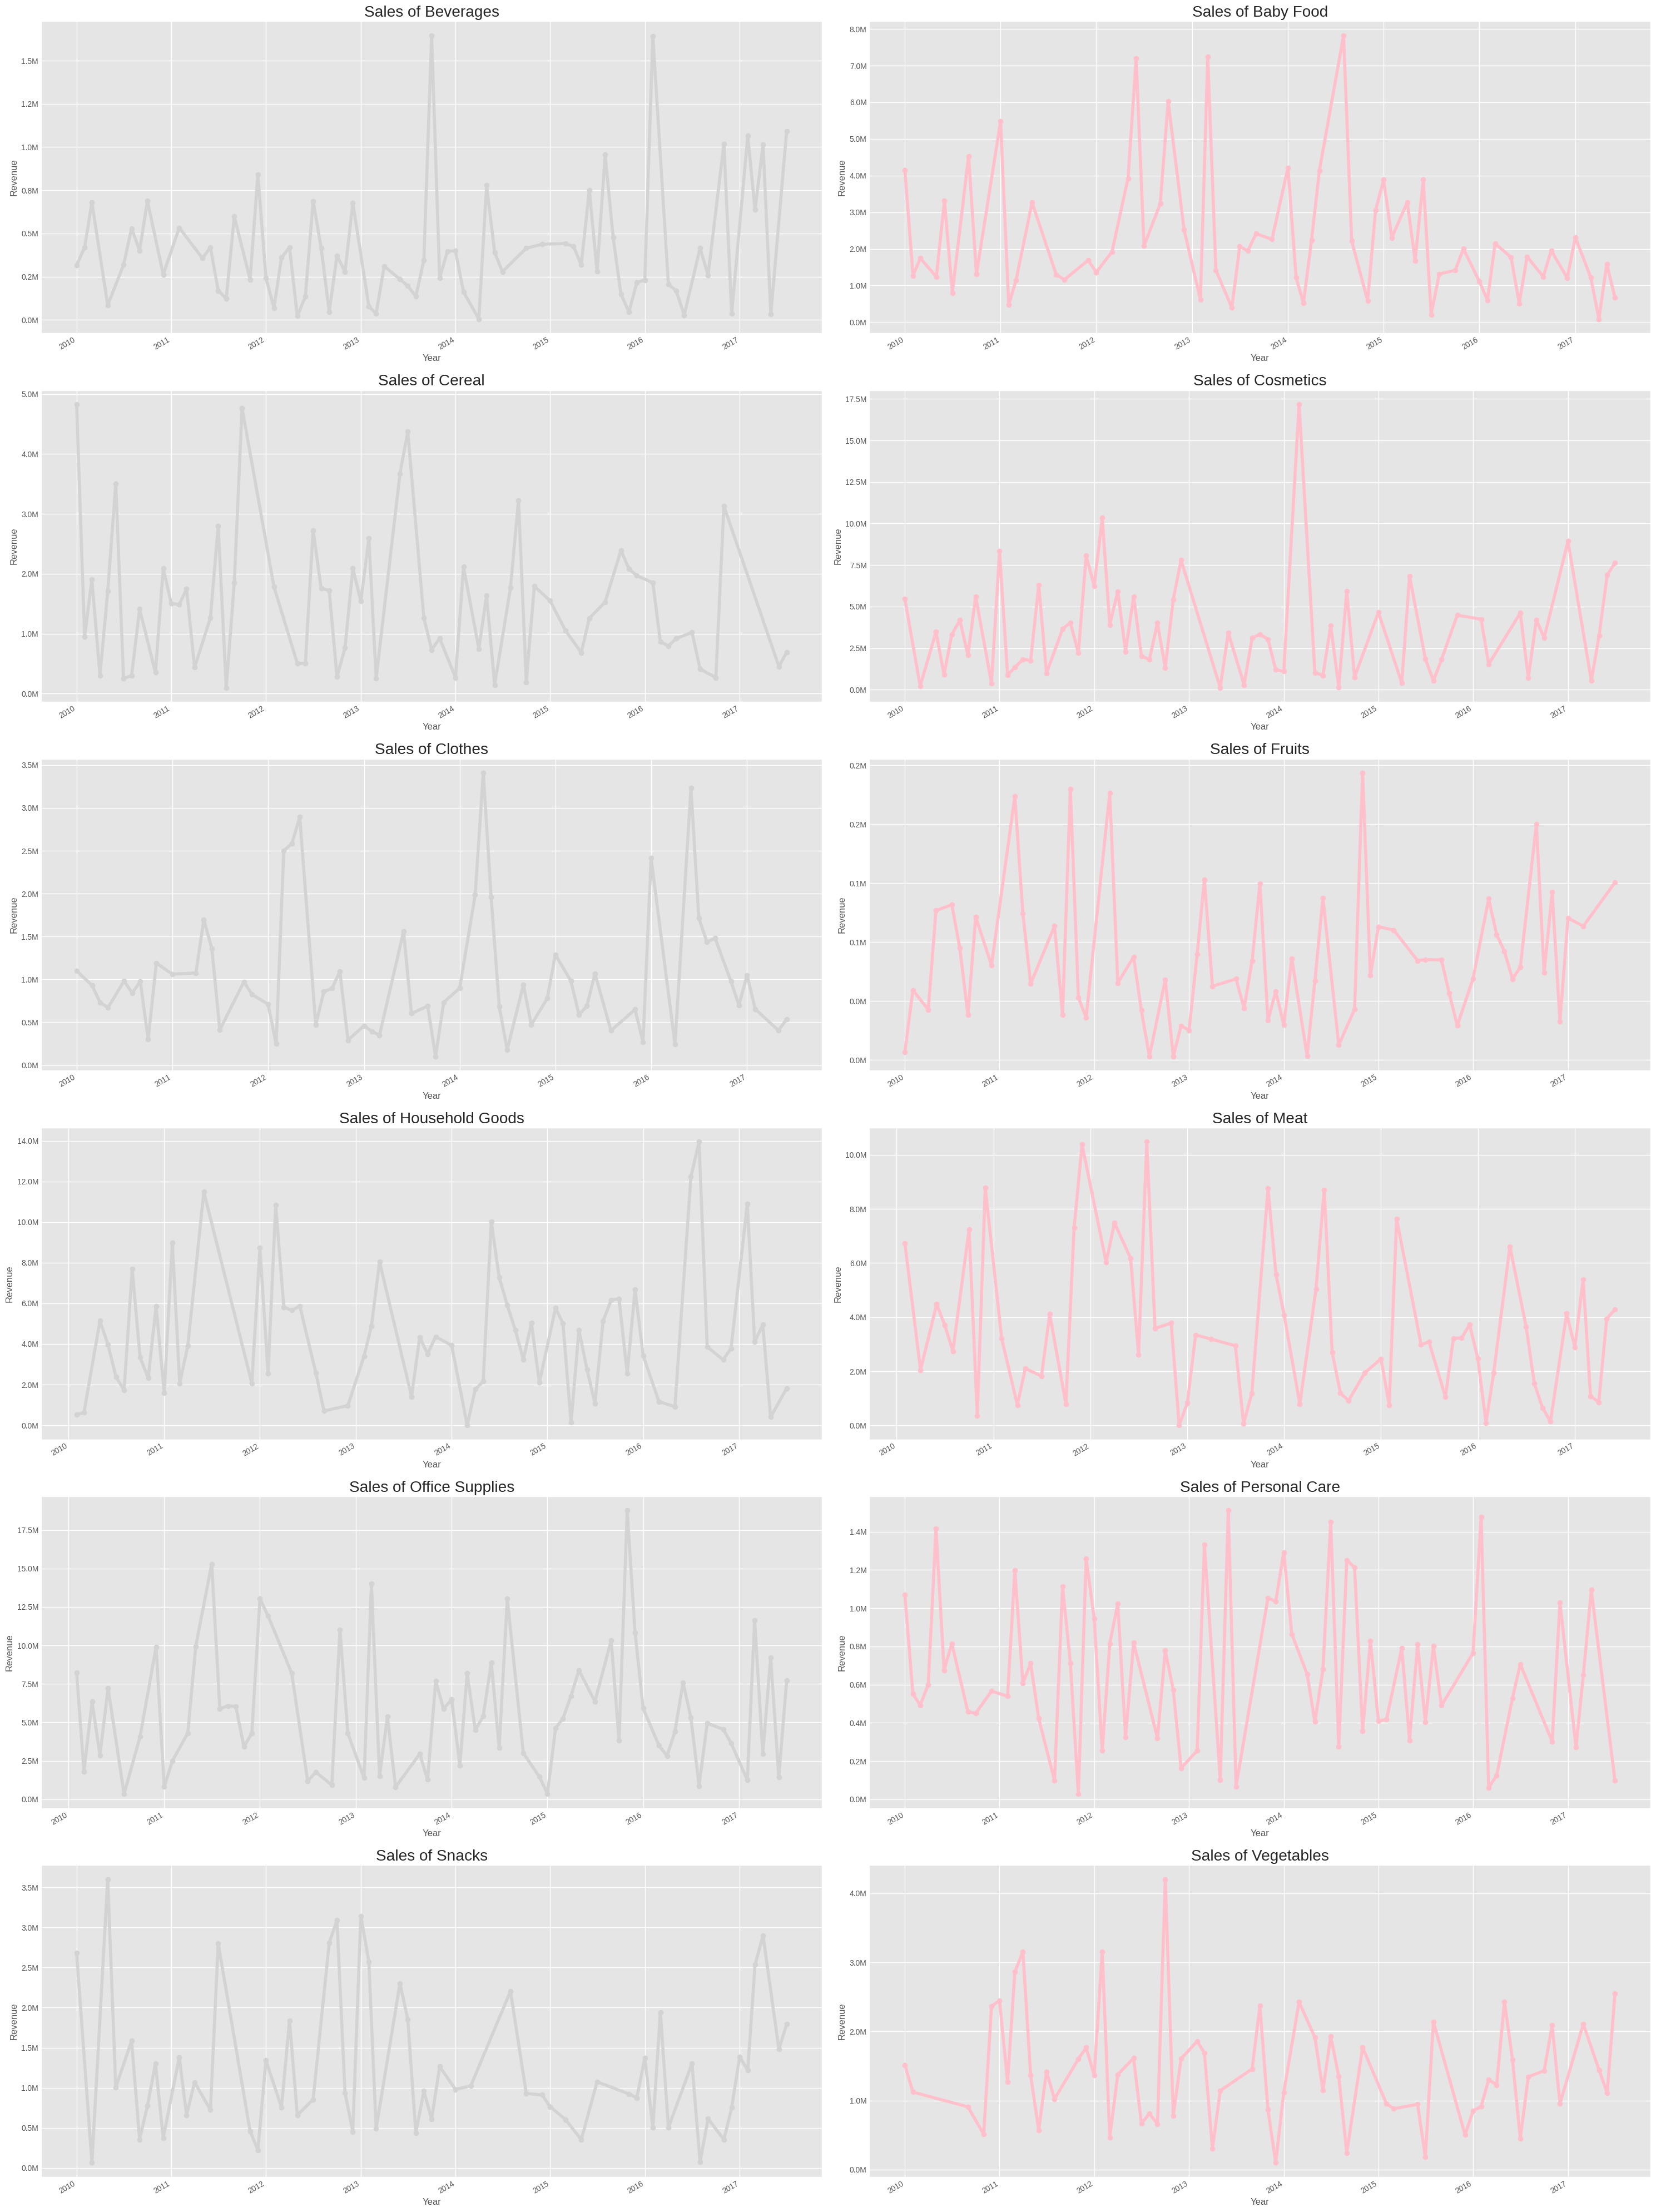

In [ ]:
# preparing the data for creating charts: filter per each product and grouping the revenue
revenue_beverages = sales[sales["item_type"] == "beverages"]
revenue_beverages_dynamic = revenue_beverages.groupby("year_month")["revenue"].sum()

revenue_baby_food = sales[sales["item_type"] == "baby food"]
revenue_baby_food_dynamic = revenue_baby_food.groupby("year_month")["revenue"].sum()

revenue_cereal = sales[sales["item_type"] == "cereal"]
revenue_cereal_dynamic = revenue_cereal.groupby("year_month")["revenue"].sum()

revenue_cosmetics = sales[sales["item_type"] == "cosmetics"]
revenue_cosmetics_dynamic = revenue_cosmetics.groupby("year_month")["revenue"].sum()

revenue_clothes = sales[sales["item_type"] == "clothes"]
revenue_clothes_dynamic = revenue_clothes.groupby("year_month")["revenue"].sum()

revenue_fruits = sales[sales["item_type"] == "fruits"]
revenue_fruits_dynamic = revenue_fruits.groupby("year_month")["revenue"].sum()

revenue_household = sales[sales["item_type"] == "household"]
revenue_household_dynamic = revenue_household.groupby("year_month")["revenue"].sum()

revenue_meat = sales[sales["item_type"] == "meat"]
revenue_meat_dynamic = revenue_meat.groupby("year_month")["revenue"].sum()

revenue_office_supplies = sales[sales["item_type"] == "office supplies"]
revenue_office_supplies_dynamic = revenue_office_supplies.groupby("year_month")["revenue"].sum()

revenue_personal_care = sales[sales["item_type"] == "personal care"]
revenue_personal_care_dynamic = revenue_personal_care.groupby("year_month")["revenue"].sum()

revenue_snacks = sales[sales["item_type"] == "snacks"]
revenue_snacks_dynamic = revenue_snacks.groupby("year_month")["revenue"].sum()

revenue_vegetables = sales[sales["item_type"] == "vegetables"]
revenue_vegetables_dynamic = revenue_vegetables.groupby("year_month")["revenue"].sum()

# creating a chart
fig, ax = plt.subplots(6, 2, figsize=(30, 40))
plt.style.use("fivethirtyeight")
for i in range(6):
    for j in range(2):
        # formating for y axis
        ax[i, j].yaxis.set_major_formatter(FuncFormatter(millions_formatter))

revenue_beverages_dynamic.plot(kind="line", ax=ax[0, 0], color="lightgray", marker="o")
ax[0, 0].set_title("Sales of Beverages")
ax[0, 0].set_xlabel("Year")
ax[0, 0].set_ylabel("Revenue")


revenue_baby_food_dynamic.plot(kind="line", ax=ax[0, 1], color="pink", marker="o")
ax[0, 1].set_title("Sales of Baby Food")
ax[0, 1].set_xlabel("Year")
ax[0, 1].set_ylabel("Revenue")

revenue_cereal_dynamic.plot(kind="line", ax=ax[1, 0], color="lightgray", marker="o")
ax[1, 0].set_title("Sales of Cereal")
ax[1, 0].set_xlabel("Year")
ax[1, 0].set_ylabel("Revenue")

revenue_cosmetics_dynamic.plot(kind="line", ax=ax[1, 1], color="pink", marker="o")
ax[1, 1].set_title("Sales of Cosmetics")
ax[1, 1].set_xlabel("Year")
ax[1, 1].set_ylabel("Revenue")

revenue_clothes_dynamic.plot(kind="line", ax=ax[2, 0], color="lightgray", marker="o")
ax[2, 0].set_title("Sales of Clothes")
ax[2, 0].set_xlabel("Year")
ax[2, 0].set_ylabel("Revenue")

revenue_fruits_dynamic.plot(kind="line", ax=ax[2, 1], color="pink", marker="o")
ax[2, 1].set_title("Sales of Fruits")
ax[2, 1].set_xlabel("Year")
ax[2, 1].set_ylabel("Revenue")

revenue_household_dynamic.plot(kind="line", ax=ax[3, 0], color="lightgray", marker="o")
ax[3, 0].set_title("Sales of Household Goods")
ax[3, 0].set_xlabel("Year")
ax[3, 0].set_ylabel("Revenue")

revenue_meat_dynamic.plot(kind="line", ax=ax[3, 1], color="pink", marker="o")
ax[3, 1].set_title("Sales of Meat")
ax[3, 1].set_xlabel("Year")
ax[3, 1].set_ylabel("Revenue")

revenue_office_supplies_dynamic.plot(kind="line", ax=ax[4, 0], color="lightgray", marker="o")
ax[4, 0].set_title("Sales of Office Supplies")
ax[4, 0].set_xlabel("Year")
ax[4, 0].set_ylabel("Revenue")

revenue_personal_care_dynamic.plot(kind="line", ax=ax[4, 1], color="pink", marker="o")
ax[4, 1].set_title("Sales of Personal Care")
ax[4, 1].set_xlabel("Year")
ax[4, 1].set_ylabel("Revenue")

revenue_snacks_dynamic.plot(kind="line", ax=ax[5, 0], color="lightgray", marker="o")
ax[5, 0].set_title("Sales of Snacks")
ax[5, 0].set_xlabel("Year")
ax[5, 0].set_ylabel("Revenue")

revenue_vegetables_dynamic.plot(kind="line", ax=ax[5, 1], color="pink", marker="o")
ax[5, 1].set_title("Sales of Vegetables")
ax[5, 1].set_xlabel("Year")
ax[5, 1].set_ylabel("Revenue")

plt.tight_layout()
plt.show()

##Order Processing time

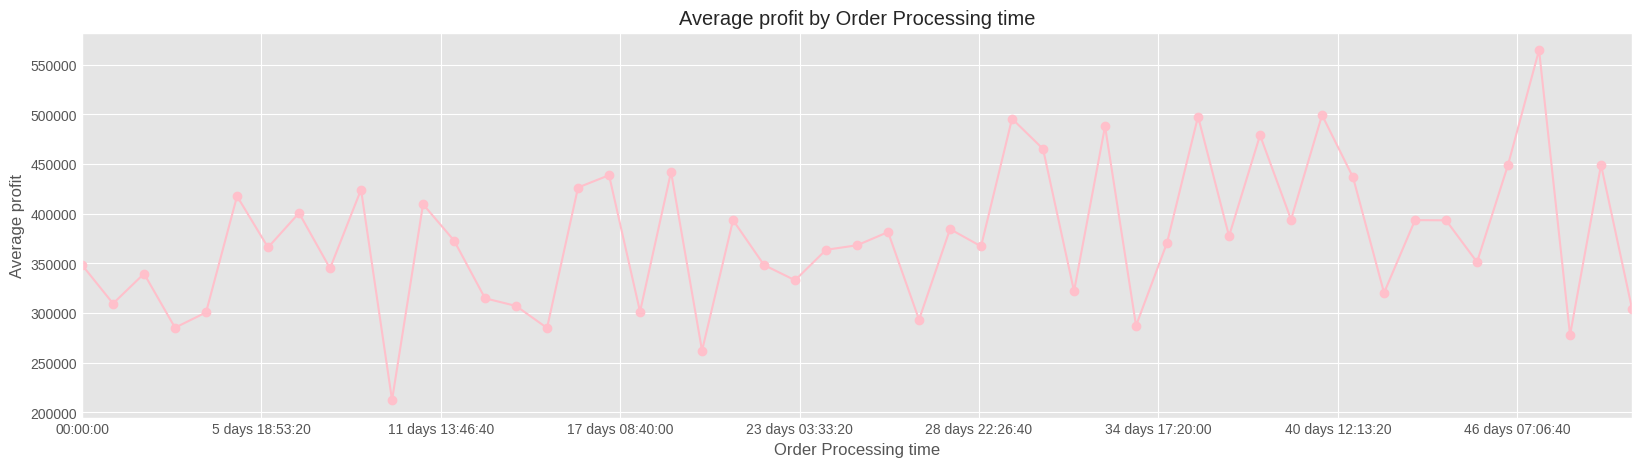

In [ ]:
#profit by Processing time
agg = sales.groupby("delivery_time")["profit"].mean()
plt.figure(figsize=(20, 5))
agg.plot(kind="line", marker="o", color="pink")
plt.style.use("ggplot")
plt.title("Average profit by Order Processing time")
plt.xlabel("Order Processing time")
plt.ylabel("Average profit")
plt.show()

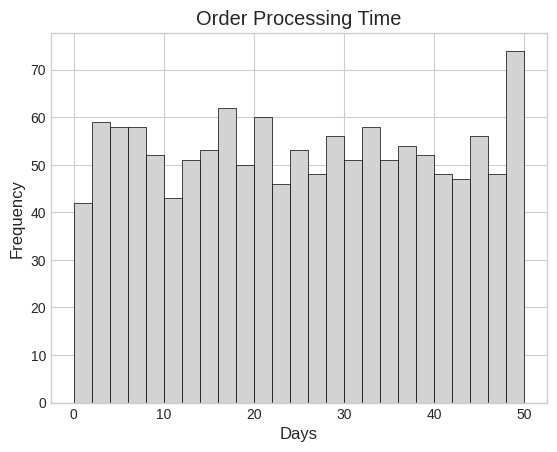

In [ ]:
#Order Processing Time Frequency
plt.hist(sales["delivery_time"].dt.days, bins=25, color="lightgrey", edgecolor="black")
plt.title("Order Processing Time")
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.show()

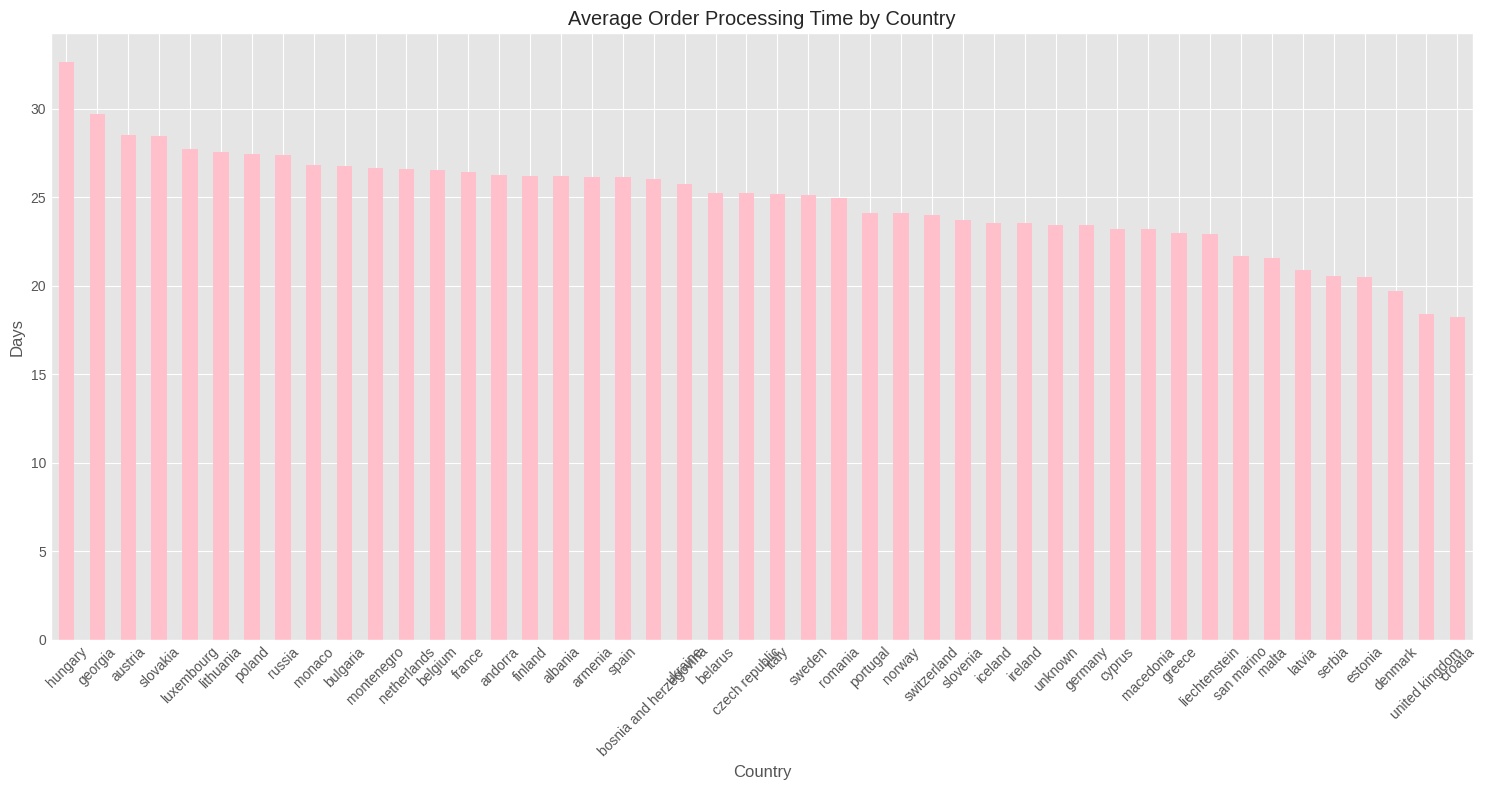

In [ ]:
# sorting the data for the chart
order_processing_time_country = sales.groupby("country")["delivery_time_days"].mean().sort_values(ascending=False)
plt.figure(figsize=(15, 8))
order_processing_time_country.plot(kind="bar", color="pink")


plt.style.use("ggplot")
plt.title("Average Order Processing Time by Country")
plt.xlabel("Country")
plt.ylabel("Days")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

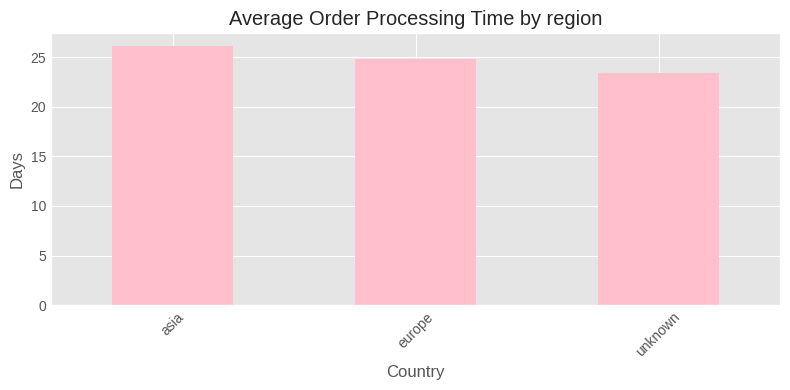

In [ ]:
# sorting the data for the chart
order_processing_time_country = sales.groupby("region")["delivery_time_days"].mean().sort_values(ascending=False)
plt.figure(figsize=(8, 4))
order_processing_time_country.plot(kind="bar", color="pink")


plt.style.use("ggplot")
plt.title("Average Order Processing Time by region")
plt.xlabel("Country")
plt.ylabel("Days")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

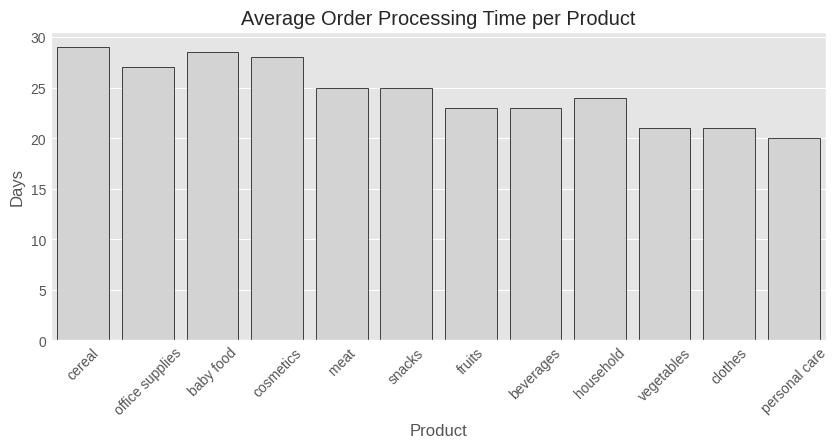

In [ ]:
order_processing_time_category = sales.groupby("item_type")["delivery_time_days"].mean().sort_values(ascending=False).index

plt.figure(figsize=(10, 4))
sns.barplot(data=sales, x="item_type", y="delivery_time_days", errorbar=("ci", False), color="lightgray", estimator=np.median, order=order_processing_time_category, edgecolor="black")
plt.title("Average Order Processing Time per Product")
plt.xlabel("Product")
plt.ylabel("Days")
plt.xticks(rotation=45)
plt.show()

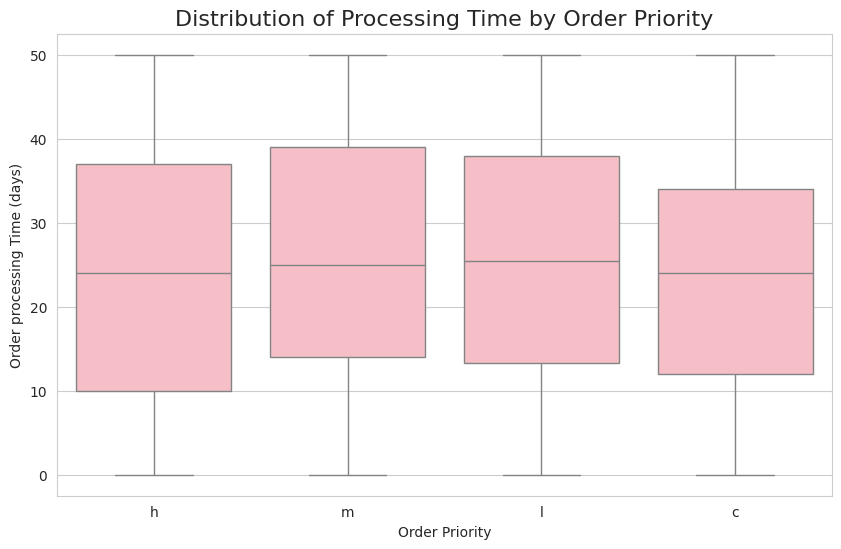

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

sns.boxplot(
    x='order_priority',
    y='delivery_time_days',
    data=sales,
    order=['h', 'm', 'l', 'c'], # H - High, M - Medium, L - Low, C - Critical
    color='lightpink'
)

plt.title('Distribution of Processing Time by Order Priority', fontsize=16)
plt.xlabel('Order Priority')
plt.ylabel('Order processing Time (days)')

plt.show()

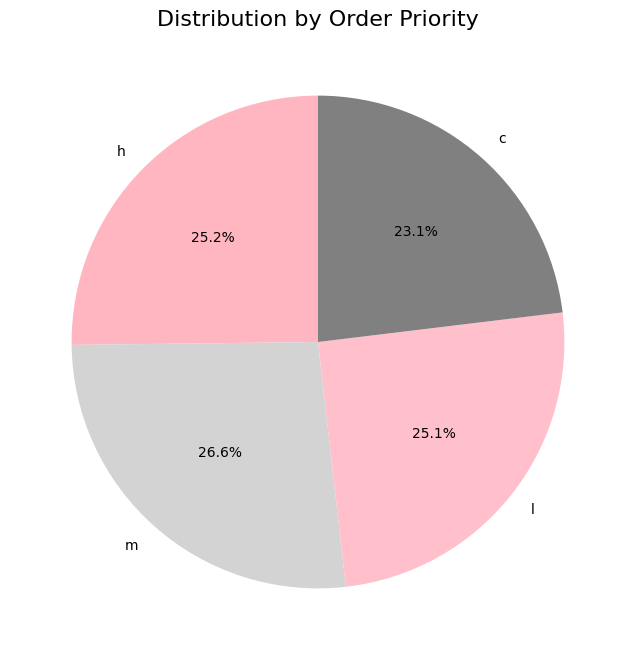

In [ ]:
# Data aggregation
priority_counts = sales['order_priority'].value_counts(dropna=False)

# Data sorting
priority_order = ['h', 'm', 'l', 'c']
priority_counts = priority_counts.reindex(priority_order)

# Colors
colors = ['lightpink', 'lightgray', 'pink', 'gray']


# Chart
plt.figure(figsize=(8, 8))
plt.style.use("default")

plt.pie(
    priority_counts.values,
    labels=priority_counts.index,
    colors=colors[:len(priority_counts)],
    autopct='%1.1f%%',
    startangle=90
)

plt.title('Distribution by Order Priority', fontsize=16)
plt.show()

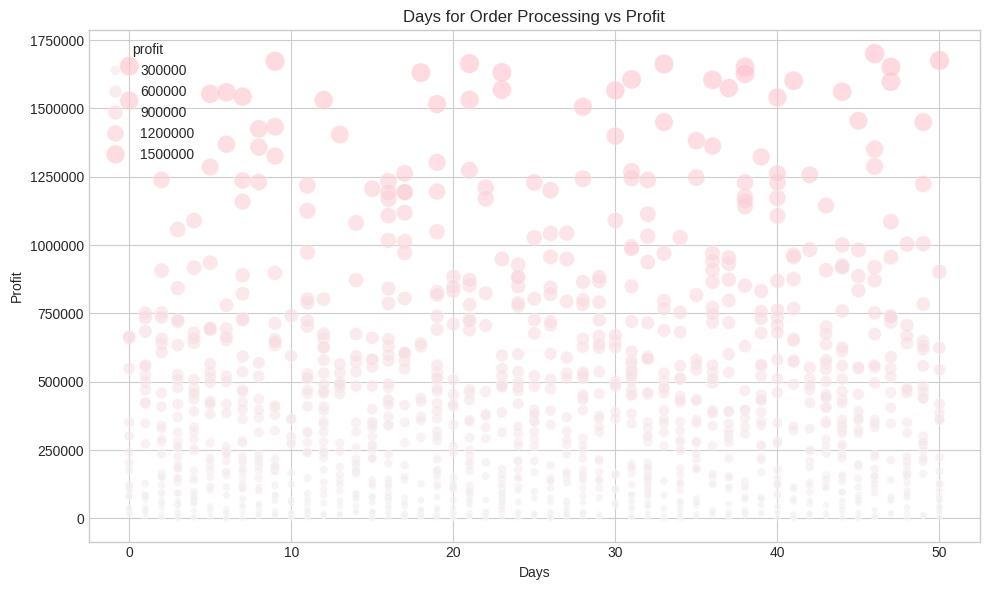

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=sales,
    x="delivery_time_days",
    y="profit",
    palette="light:pink",
    hue="profit",
    size="profit",
    sizes=(20, 200),
    alpha=0.6
)

plt.title("Days for Order Processing vs Profit")
plt.xlabel("Days")
plt.ylabel("Profit")

plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()

##Sales by Days of the week

In [ ]:
# new df with sorting
sales["week_day"] = sales["order_date"].dt.day_name()
sales_by_week_day = sales.groupby("week_day")["revenue"].sum().reset_index()
sales_by_week_day["day_number"] = [5, 1, 6, 7, 4, 2, 3]
sales_per_week_day = sales_by_week_day.sort_values(by="day_number")

sales_per_week_day

week_day       revenue  day_number
1     Monday  2.758740e+08           1
5    Tuesday  2.156173e+08           2
6  Wednesday  2.612157e+08           3
4   Thursday  2.149222e+08           4
0     Friday  2.638070e+08           5
2   Saturday  2.336411e+08           6
3     Sunday  2.395510e+08           7

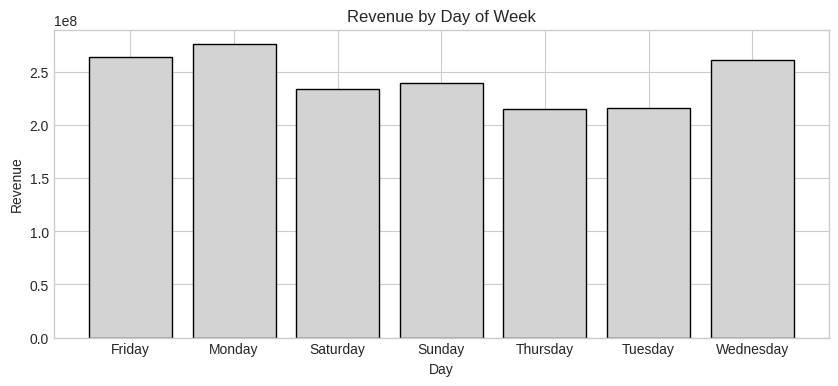

In [ ]:
plt.figure(figsize=(10, 4))
plt.style.use("default")
plt.style.use("seaborn-v0_8-whitegrid")
plt.bar(sales_by_week_day["week_day"], sales_by_week_day["revenue"], color="lightgray", edgecolor="black")
plt.title("Revenue by Day of Week")
plt.xlabel("Day")
plt.ylabel("Revenue")
plt.show()

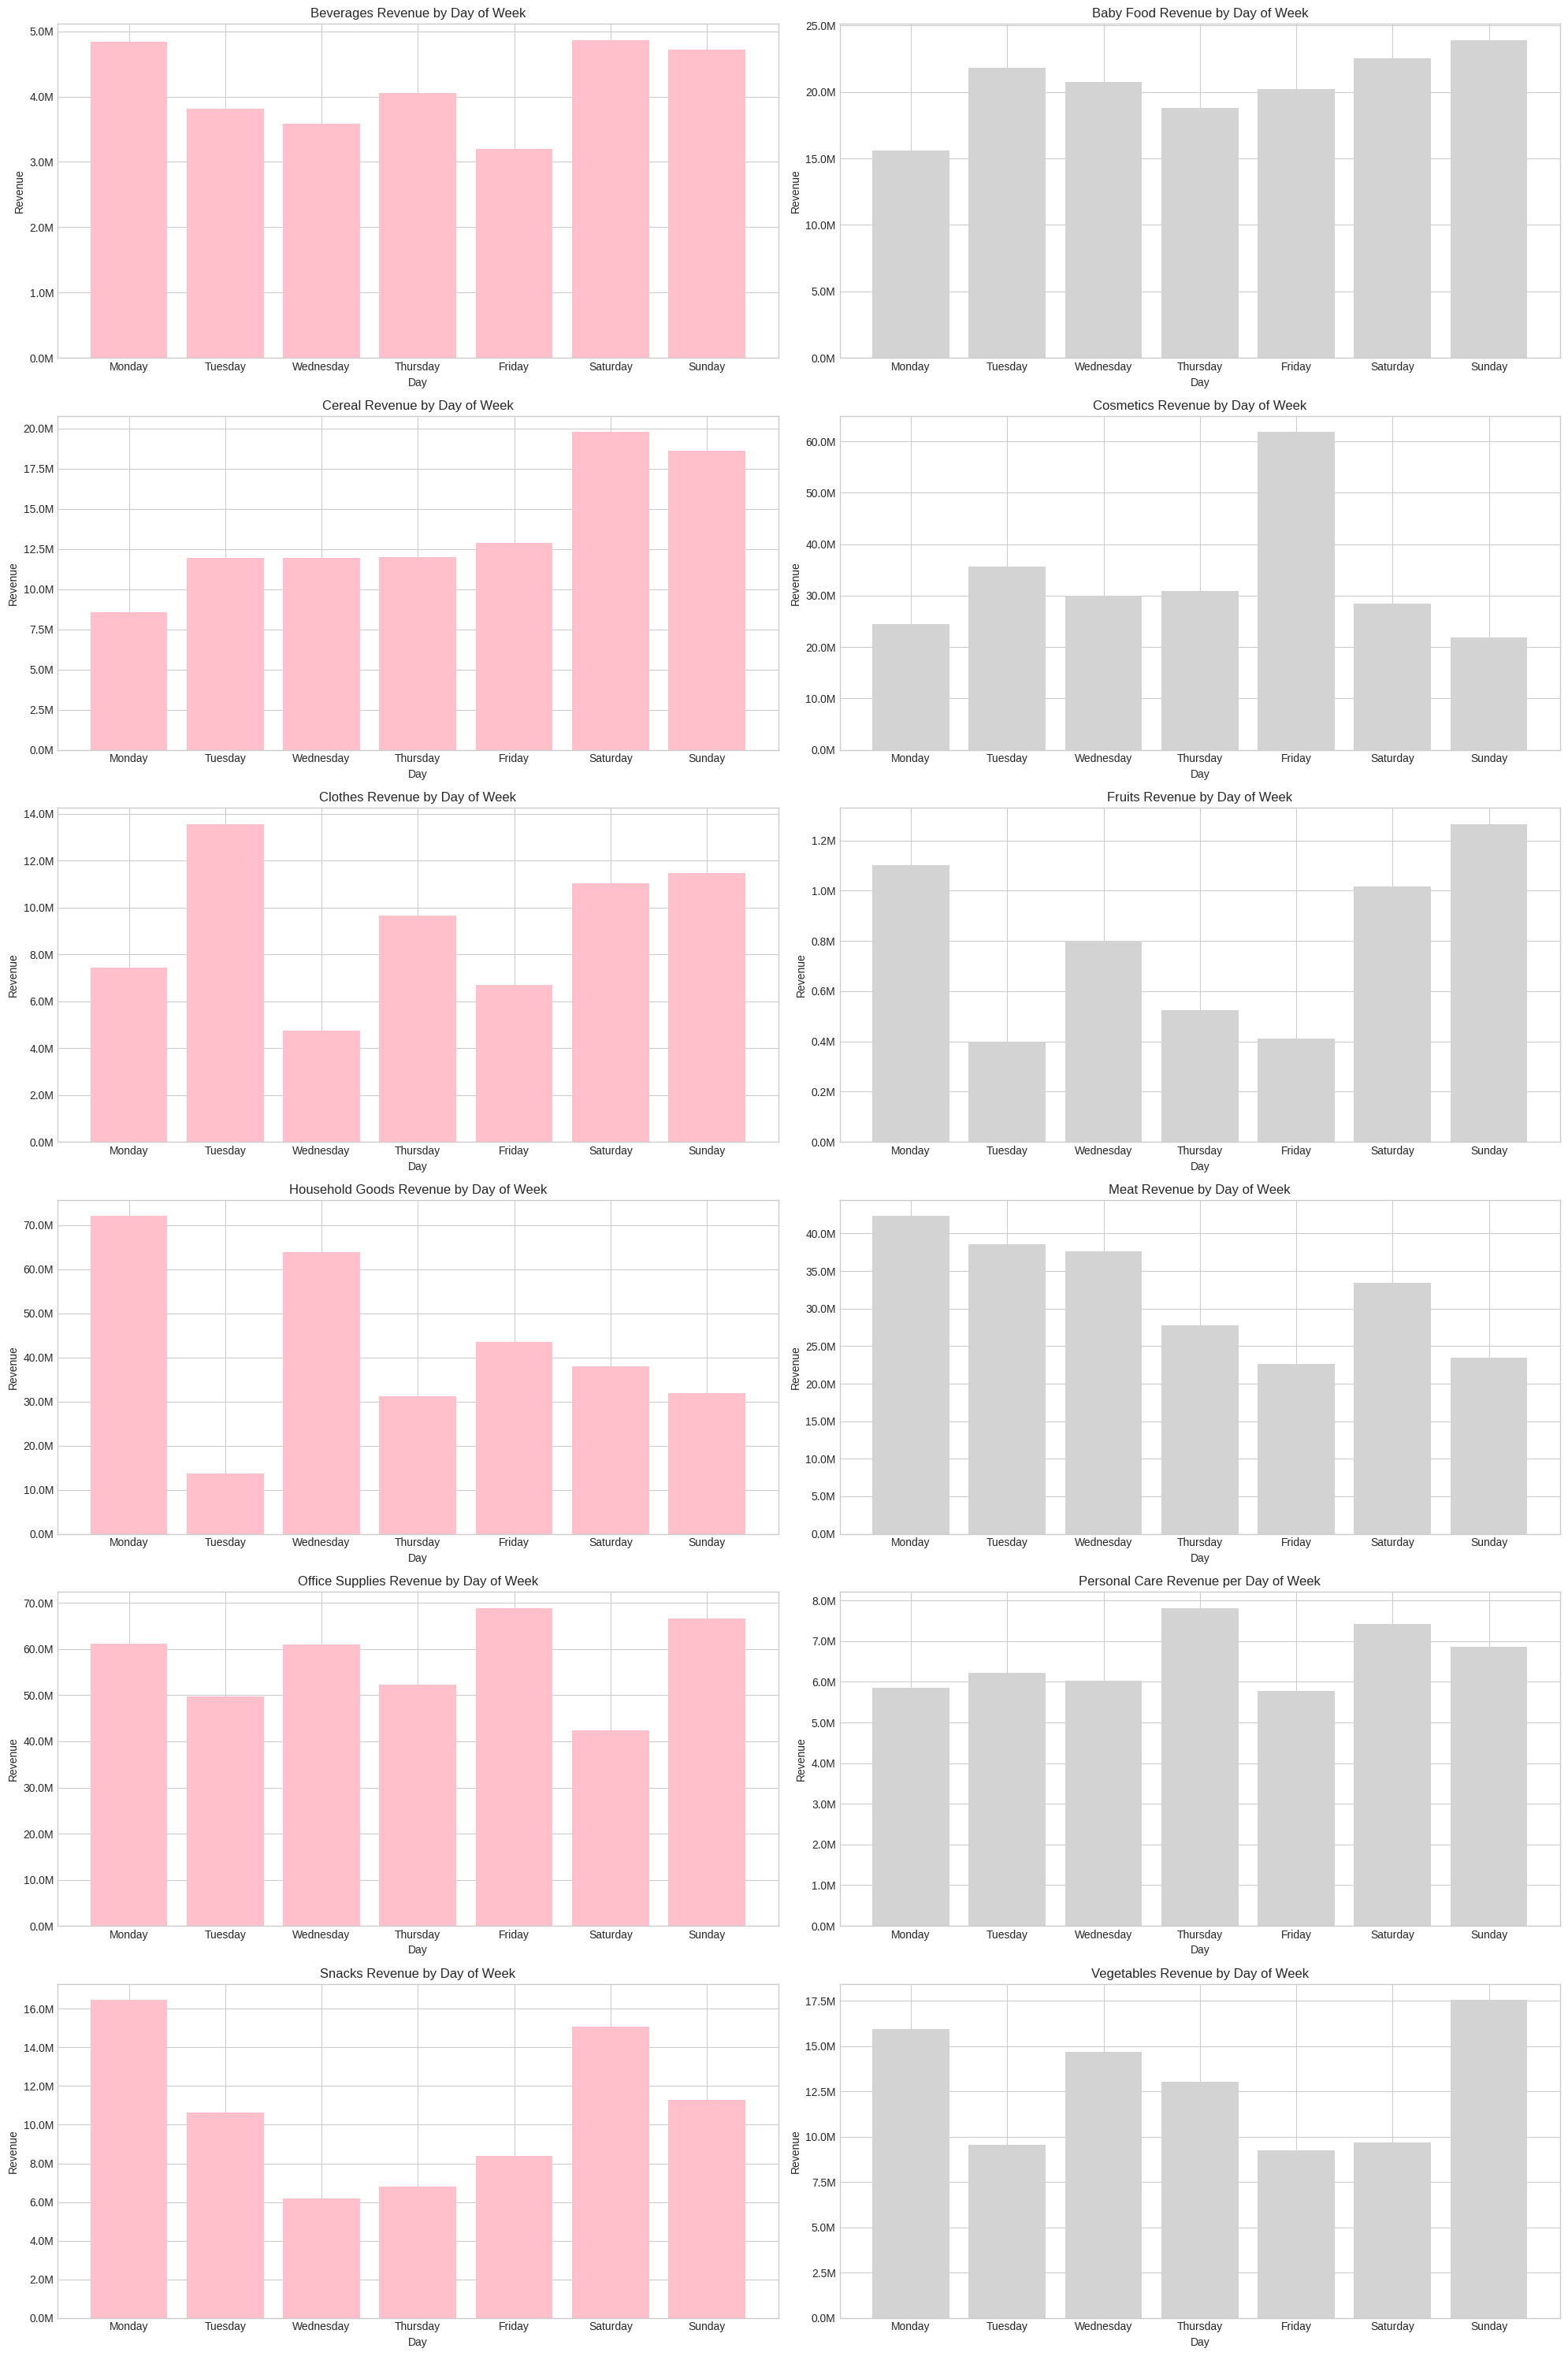

In [ ]:
# preparing the data for creating charts

revenue_cosmetics_day = sales[sales["item_type"] == "cosmetics"]
revenue_cosmetics_day_dynamic = revenue_cosmetics_day.groupby("week_day")["revenue"].sum().reset_index()
revenue_cosmetics_day_dynamic["day_number"] = [5, 1, 6, 7, 4, 2, 3]
revenue_cosmetics_day_dynamic = revenue_cosmetics_day_dynamic.sort_values(by="day_number")

revenue_beverages_day = sales[sales["item_type"] == "beverages"]
revenue_beverages_day_dynamic = revenue_beverages_day.groupby("week_day")["revenue"].sum().reset_index()
revenue_beverages_day_dynamic["day_number"] = [5, 1, 6, 7, 4, 2, 3]
revenue_beverages_day_dynamic = revenue_beverages_day_dynamic.sort_values(by="day_number")


revenue_cereal_day = sales[sales["item_type"] == "cereal"]
revenue_cereal_day_dynamic = revenue_cereal_day.groupby("week_day")["revenue"].sum().reset_index()
revenue_cereal_day_dynamic["day_number"] = [5, 1, 6, 7, 4, 2, 3]
revenue_cereal_day_dynamic = revenue_cereal_day_dynamic.sort_values(by="day_number")


revenue_clothes_day = sales[sales["item_type"] == "clothes"]
revenue_clothes_day_dynamic = revenue_clothes_day.groupby("week_day")["revenue"].sum().reset_index()
revenue_clothes_day_dynamic["day_number"] = [5, 1, 6, 7, 4, 2, 3]
revenue_clothes_day_dynamic = revenue_clothes_day_dynamic.sort_values(by="day_number")

revenue_vegetables_day = sales[sales["item_type"] == "vegetables"]
revenue_vegetables_day_dynamic = revenue_vegetables_day.groupby("week_day")["revenue"].sum().reset_index()
revenue_vegetables_day_dynamic["day_number"] = [5, 1, 6, 7, 4, 2, 3]
revenue_vegetables_day_dynamic = revenue_vegetables_day_dynamic.sort_values(by="day_number")

revenue_fruits_day = sales[sales["item_type"] == "fruits"]
revenue_fruits_day_dynamic = revenue_fruits_day.groupby("week_day")["revenue"].sum().reset_index()
revenue_fruits_day_dynamic["day_number"] = [5, 1, 6, 7, 4, 2, 3]
revenue_fruits_day_dynamic = revenue_fruits_day_dynamic.sort_values(by="day_number")

revenue_household_day = sales[sales["item_type"] == "household"]
revenue_household_day_dynamic = revenue_household_day.groupby("week_day")["revenue"].sum().reset_index()
revenue_household_day_dynamic["day_number"] = [5, 1, 6, 7, 4, 2, 3]
revenue_household_day_dynamic = revenue_household_day_dynamic.sort_values(by="day_number")

revenue_meat_day = sales[sales["item_type"] == "meat"]
revenue_meat_day_dynamic = revenue_meat_day.groupby("week_day")["revenue"].sum().reset_index()
revenue_meat_day_dynamic["day_number"] = [5, 1, 6, 7, 4, 2, 3]
revenue_meat_day_dynamic = revenue_meat_day_dynamic.sort_values(by="day_number")

revenue_office_supplies_day = sales[sales["item_type"] == "office supplies"]
revenue_office_supplies_day_dynamic = revenue_office_supplies_day.groupby("week_day")["revenue"].sum().reset_index()
revenue_office_supplies_day_dynamic["day_number"] = [5, 1, 6, 7, 4, 2, 3]
revenue_office_supplies_day_dynamic = revenue_office_supplies_day_dynamic.sort_values(by="day_number")

revenue_baby_food_day = sales[sales["item_type"] == "baby food"]
revenue_baby_food_day_dynamic = revenue_baby_food_day.groupby("week_day")["revenue"].sum().reset_index()
revenue_baby_food_day_dynamic["day_number"] = [5, 1, 6, 7, 4, 2, 3]
revenue_baby_food_day_dynamic = revenue_baby_food_day_dynamic.sort_values(by="day_number")

revenue_personal_care_day = sales[sales["item_type"] == "personal care"]
revenue_personal_care_day_dynamic = revenue_personal_care_day.groupby("week_day")["revenue"].sum().reset_index()
revenue_personal_care_day_dynamic["day_number"] = [5, 1, 6, 7, 4, 2, 3]
revenue_personal_care_day_dynamic = revenue_personal_care_day_dynamic.sort_values(by="day_number")

revenue_snacks_day = sales[sales["item_type"] == "snacks"]
revenue_snacks_day_dynamic = revenue_snacks_day.groupby("week_day")["revenue"].sum().reset_index()
revenue_snacks_day_dynamic["day_number"] = [5, 1, 6, 7, 4, 2, 3]
revenue_snacks_day_dynamic = revenue_snacks_day_dynamic.sort_values(by="day_number")


# creating the chart for each product
fig, ax = plt.subplots(6, 2, figsize=(20, 30))
plt.style.use("seaborn-v0_8-whitegrid")
for i in range(6):
    for j in range(2):
        # formating for y axis
        ax[i, j].yaxis.set_major_formatter(FuncFormatter(millions_formatter))

ax[0, 0].bar(revenue_beverages_day_dynamic["week_day"], revenue_beverages_day_dynamic["revenue"], color="pink")
ax[0, 0].set_title("Beverages Revenue by Day of Week")
ax[0, 0].set_xlabel("Day")
ax[0, 0].set_ylabel("Revenue")

ax[0, 1].bar(revenue_baby_food_day_dynamic["week_day"], revenue_baby_food_day_dynamic["revenue"], color="lightgray")
ax[0, 1].set_title("Baby Food Revenue by Day of Week")
ax[0, 1].set_xlabel("Day")
ax[0, 1].set_ylabel("Revenue")

ax[1, 0].bar(revenue_cereal_day_dynamic["week_day"], revenue_cereal_day_dynamic["revenue"], color="pink")
ax[1, 0].set_title("Cereal Revenue by Day of Week")
ax[1, 0].set_xlabel("Day")
ax[1, 0].set_ylabel("Revenue")

ax[1, 1].bar(revenue_cosmetics_day_dynamic["week_day"], revenue_cosmetics_day_dynamic["revenue"], color="lightgray")
ax[1, 1].set_title("Cosmetics Revenue by Day of Week")
ax[1, 1].set_xlabel("Day")
ax[1, 1].set_ylabel("Revenue")

ax[2, 0].bar(revenue_clothes_day_dynamic["week_day"], revenue_clothes_day_dynamic["revenue"], color="pink")
ax[2, 0].set_title("Clothes Revenue by Day of Week")
ax[2, 0].set_xlabel("Day")
ax[2, 0].set_ylabel("Revenue")

ax[2, 1].bar(revenue_fruits_day_dynamic["week_day"], revenue_fruits_day_dynamic["revenue"], color="lightgray")
ax[2, 1].set_title("Fruits Revenue by Day of Week")
ax[2, 1].set_xlabel("Day")
ax[2, 1].set_ylabel("Revenue")

ax[3, 0].bar(revenue_household_day_dynamic["week_day"], revenue_household_day_dynamic["revenue"], color="pink")
ax[3, 0].set_title("Household Goods Revenue by Day of Week")
ax[3, 0].set_xlabel("Day")
ax[3, 0].set_ylabel("Revenue")

ax[3, 1].bar(revenue_meat_day_dynamic["week_day"], revenue_meat_day_dynamic["revenue"], color="lightgray")
ax[3, 1].set_title("Meat Revenue by Day of Week")
ax[3, 1].set_xlabel("Day")
ax[3, 1].set_ylabel("Revenue")

ax[4, 0].bar(revenue_office_supplies_day_dynamic["week_day"], revenue_office_supplies_day_dynamic["revenue"], color="pink")
ax[4, 0].set_title("Office Supplies Revenue by Day of Week")
ax[4, 0].set_xlabel("Day")
ax[4, 0].set_ylabel("Revenue")

ax[4, 1].bar(revenue_personal_care_day_dynamic["week_day"], revenue_personal_care_day_dynamic["revenue"], color="lightgray")
ax[4, 1].set_title("Personal Care Revenue per Day of Week")
ax[4, 1].set_xlabel("Day")
ax[4, 1].set_ylabel("Revenue")

ax[5, 0].bar(revenue_snacks_day_dynamic["week_day"], revenue_snacks_day_dynamic["revenue"], color="pink")
ax[5, 0].set_title("Snacks Revenue by Day of Week")
ax[5, 0].set_xlabel("Day")
ax[5, 0].set_ylabel("Revenue")

ax[5, 1].bar(revenue_vegetables_day_dynamic["week_day"], revenue_vegetables_day_dynamic["revenue"], color="lightgray")
ax[5, 1].set_title("Vegetables Revenue by Day of Week")
ax[5, 1].set_xlabel("Day")
ax[5, 1].set_ylabel("Revenue")

plt.tight_layout()
plt.show()

***Summary***

1. **Financial Performance and Geographical Concentration**.

The company's financial success is heavily concentrated geographically and exhibits high volatility over time.

Geographical Dominance: Europe is the absolute financial leader, generating 90% of the company's total profit.

*   **Geographical Dominance: Europe** is the absolute financial leader, generating 90% of the company's total profit.
Key Profit Source: **Southern Europe** is the primary driver of profit within the European region.  

*   **Top seven countries** : Andorra, Ukraine, Malta, San Marino, Hungary, Macedonia, Czech Republic.
Strategic focus on the top countries offers the potential for substantial market growth.

*   Profit Volatility: The overall profit trend throughout the analyzed period demonstrates significant instability.  
Peak Periods: Substantial profit spikes were recorded in 2012 and 2017, suggesting the presence of large, non-recurring deals or market events.


2. **Sales Channels and Strategic Recommendation**.

The company relies heavily on traditional sales methods.

*   **Channel Dominance:** The **Offline channel** dominates in terms of units sold. The company currently relies on traditional sales channels.

*   **Recommendation:** It is recommended to invest in increasing the share of online sales for strategic diversification of revenue streams.  



3. **Operational Efficiency and Profit Correlation**.

There is a critical link between processing speed and profitability.


*  Profit Correlation: A **direct, strong positive correlation** exists between the speed of order processing and profit. Orders processed the fastest are the most profitable.
*   The largest share of total profit is generated by orders processed very quickly, **within 10 days or less**.


4. **Logistics and Customer Service Risk**.

The priority shipping system is fast but unreliable for premium customers.

*   **Speed vs. Reliability:** Priority orders are shipped significantly faster than low-priority orders.
*   **The median delivery time** for these orders is approximately **23 days**.
*   **50% of orders** in this category are delivered faster than 23 days, with **25% delivered faster than 10 days**.
*   **High Variability Risk:** The high-priority segment (H) also exhibits the greatest variability (longest box on the Box Plot). Although 50% of these orders are delivered quickly, the **other 50% can be significantly delayed**.
*   **Customer Dissatisfaction**: Customers who pay for "high priority" are receiving **the greatest service unpredictability**, which is likely a major source of dissatisfaction.
*   **Action Required**: Immediate steps must be taken to reduce the variability (box length) for High Priority (H) to at least the level of Low Priority (L), ensuring that the "fastest" also guarantees the "most reliable"


5. **Product Performance and Seasonality**.

*Profit Drivers (Top 3)* - Cosmetics, Household Goods, and Office supplies.	These are the core categories generating the highest overall profit.  

*Low-Profit Items* -	Fruits, Personal care, and Baverages.	These items show the lowest overall profit metrics.  

*Cosmetics*	-	Strong peaks at the end of the year (November/December), driven by the holiday season.  

*Household Goods* -	High volatility	Volatile. Major spikes in 2012 and 2017 were non-seasonal and were likely due to large, one-off deals.  

*Meat, Baby Food, Snacks* -	Stable base income.	Minimal seasonality. These ensure stable baseline revenue.  

*Clothes*	- Moderate	Bi-annual cyclicality (tied to seasonal changes).

*Fruits, Vegetables* -	Low	Pronounced seasonality linked to harvest periods.

The profit generated by item categories varies significantly depending on the **day of the week**, indicating distinct consumer purchasing patterns.  
Top Profit-Generating Categories:  

Monday -	Snacks, Household Goods, Meat, and Beverages.

Tuesday -	Clothes.

Wednesday -	No dominant category.

Thursday -	Personal Care.

Friday -	Office Supplies and Cosmetics.

Saturday -	Cereal and Beverages.

Sunday -	Vegetables, Fruits, and Baby Food


